# Home Credit Default Risk
<a id="ID_top"></a>

Use nbviewer to view an interactive version of the code [here](https://nbviewer.jupyter.org/github/milesin3d/HomeCreditDefaultRisk/blob/master/HomeCreditDefaultRisk.ipynb 'Click Here').

# Outline
---
- [1) Introduction](#ID_1) <br>
    - [1.1) Problem Statement](#ID_1.1) <br>
    - [1.2) Import Libraries](#ID_1.2) <br>

- [2) Data](#ID_2) <br>
    - [2.1) Read Files](#ID_2.1) <br>
    - [2.2) Descriptions](#ID_2.2) <br>
    - [2.3) Feature Types](#ID_2.3) <br>
    - [2.4) Missing Values](#ID_2.4) <br>
    - [2.5) Outlier Treatment](#ID_2.5) <br>
    - [2.6) Feature Engineering](#ID_2.6) <br>
    - [2.7) Combine Datasets](#ID_2.7) <br>
    - [2.8) Exploratory Data Analysts (EDA)](#ID_2.8) <br>
    - [2.9) Encoding](#ID_2.9) <br>
        - [2.9.1) Label Encoding](#ID_2.9.1) <br>
        - [2.9.2) One-Hot Encoding](#ID_2.9.2) <br>
    - [2.10) Balanced Dataset](#ID_2.10) <br>
    - [2.11) Split Dataset](#ID_2.11) <br>
        - [2.11.1) Split Data into Train_Test and Predict](#ID_2.11.1) <br>
        - [2.11.2) Split Data into XY](#ID_2.11.2) <br>
        - [2.11.3) Split Data into Train and Test](#ID_2.11.3) <br>
    - [2.12) Variable Selection](#ID_2.12) <br>
        - [2.12.1) Information Value Analysis (IV)](#ID_2.12.1) <br>
        - [2.12.2) Variance Inflation Factor (VIF)](#ID_2.12.2) <br>
        - [2.12.3) Final Training and Test Sets](#ID_2.12.3) <br>

- [3) Machine Learning](#ID_3) <br>
    - [3.1) Preprocess Data](#ID_3.1) <br>
    - [3.2) Create Metrics Table](#ID_3.2) <br>
    - [3.3) Instantiate the Models](#ID_3.3) <br>
    - [3.4) Specifiy the Hyperparameter Space](#ID_3.4) <br>
    - [3.5) Train and Score Function](#ID_3.5) <br>
        - [3.5.1) Instantiate CV Objects](#ID_3.5.1) <br>
        - [3.5.2) Train, Predict, Score Function](#ID_3.5.2) <br> 
    - [3.6) Models](#ID_3.6) <br>
        - [3.6.1) Switches](#ID_3.6.1) <br>
        - [3.6.2) Run Models](#ID_3.6.2) <br>  
        - [3.6.3) Metrics](#ID_3.6.3) <br>
    - [3.7) Best Model](#ID_3.7) <br>

- [4) Review](#ID_4) <br>
    - [4.1) Summary](#ID_4.1) <br>
    - [4.2) Future Steps](#ID_4.2) <br>

# 1) Introduction ___ ___ ___ ___ ___ ___ ___ ___ ___ ___ ___ ___ ___ ___ ___ ___ ___ ___
<a id="ID_1"></a>
[Back to Top](#ID_top) <br>

## 1.1) Problem Statement
---
<a id="ID_1.1"></a>

Use alternative data to predict the repayment ability of people with insufficient or non-existent credit histories.

## 1.2) Import Libraries
---
<a id="ID_1.2"></a>

In [1]:
# python packages used throughout the project

# importing and reading files
import chardet # check encoding for csv file
import os # for reading csv files
import glob # for reading csv files

# tabular data handling
import pandas as pd
import numpy as np

# plot data
import matplotlib.pyplot as plt
import seaborn as sns

import math

# warning package
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) # suppress the warning globally

# 2) Data ___ ___ ___ ___ ___ ___ ___ ___ ___ ___ ___ ___ ___ ___ ___ ___ ___ ___
<a id="ID_2"></a>
[Back to Top](#ID_top) <br>

## 2.1) Read Files
---
<a id="ID_2.1"></a>

In [2]:
# create a dictionary with file names and their abbreviations

# abbreviations for each data file
data_abb_names = ['a_test', 
                  'a_train', 
                  'b', 
                  'bb', 
                  'ccb', 
                  'hccd', 
                  'ip', 
                  'pcb', 
                  'pa', 
                  'ss']

# file path for csv files
path = r'data/raw'

# list of file names to be read
data_file_names = glob.glob(os.path.join(path, "*.csv")) 

# dictionary of file name and abbreviation
data_file_abb = dict(zip(data_file_names, data_abb_names))

# don't need to import description file
data_file_abb.pop('data/raw\\HomeCredit_columns_description.csv', None)

data_file_abb

{'data/raw\\application_test.csv': 'a_test',
 'data/raw\\application_train.csv': 'a_train',
 'data/raw\\bureau.csv': 'b',
 'data/raw\\bureau_balance.csv': 'bb',
 'data/raw\\credit_card_balance.csv': 'ccb',
 'data/raw\\installments_payments.csv': 'ip',
 'data/raw\\POS_CASH_balance.csv': 'pcb',
 'data/raw\\previous_application.csv': 'pa',
 'data/raw\\sample_submission.csv': 'ss'}

In [3]:
# use a for loop to import data from csv files

for k, v in data_file_abb.items():
    print(k) # print file name and location
    
    df_name = data_file_abb[k] # use the abbreviation to name the df
    
    vars()[df_name] = pd.read_csv(k, # file name
                                  header=0, # first row has the column headers
                                  index_col=0, # first column has the index values
                                  nrows=10000) # read only n rows


data/raw\application_test.csv
data/raw\application_train.csv
data/raw\bureau.csv
data/raw\bureau_balance.csv
data/raw\credit_card_balance.csv
data/raw\installments_payments.csv
data/raw\POS_CASH_balance.csv
data/raw\previous_application.csv
data/raw\sample_submission.csv


## 2.2) Descriptions
---
<a id="ID_2.2"></a>

- column descriptions
- preview 5 rows
- info
- describe

In [4]:
# read decription csv
# this file includes all the column headers for each of the files and a description for each

# check encoding for csv file
with open('data/raw\\HomeCredit_columns_description.csv', 'rb') as f:
    result = chardet.detect(f.read())
    
# read file
descrip = pd.read_csv('data/raw\\HomeCredit_columns_description.csv', 
                 index_col=0, 
                 encoding=result['encoding'])
descrip = descrip.replace(np.nan, '', regex=True)
descrip.head()

,Table,Row,Description,Special
1,application_{train|test}.csv,SK_ID_CURR,ID of loan in our sample,
2,application_{train|test}.csv,TARGET,Target variable (1 - client with payment diffi...,
5,application_{train|test}.csv,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,
6,application_{train|test}.csv,CODE_GENDER,Gender of the client,
7,application_{train|test}.csv,FLAG_OWN_CAR,Flag if the client owns a car,


### 2.2.1) Application_test|train

In [5]:
# column descriptions
descrip[descrip['Table']=='application_{train|test}.csv'][['Row','Description','Special']]

,Row,Description,Special
1,SK_ID_CURR,ID of loan in our sample,
2,TARGET,Target variable (1 - client with payment diffi...,
5,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,
6,CODE_GENDER,Gender of the client,
7,FLAG_OWN_CAR,Flag if the client owns a car,
8,FLAG_OWN_REALTY,Flag if client owns a house or flat,
9,CNT_CHILDREN,Number of children the client has,
10,AMT_INCOME_TOTAL,Income of the client,
11,AMT_CREDIT,Credit amount of the loan,
12,AMT_ANNUITY,Loan annuity,


In [6]:
# application_train.csv
print("The training data has %s loan applications, with %s features, plus the target variable." \
      % (a_train.shape[0],a_train.shape[1]-1))
a_train.head()

The training data has 10000 loan applications, with 120 features, plus the target variable.


,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
a_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 100002 to 111633
Columns: 121 entries, TARGET to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(40), object(16)
memory usage: 9.3+ MB


In [8]:
a_train.describe()

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,10000.000000,10000.000000,1.000000e+04,1.000000e+04,10000.000000,9.993000e+03,10000.000000,10000.000000,10000.00000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,8634.000000,8634.000000,8634.000000,8634.000000,8634.000000,8634.000000
mean,0.077500,0.416300,1.674489e+05,6.007531e+05,27088.010550,5.403851e+05,0.020898,-16025.273100,62821.78480,-4986.483900,...,0.006900,0.000400,0.000500,0.000300,0.007297,0.008107,0.032893,0.274612,0.269748,1.889738
std,0.267397,0.722251,9.422260e+04,4.032643e+05,14384.946154,3.708941e+05,0.013909,4340.528828,140464.31594,3540.591931,...,0.082783,0.019997,0.022356,0.017319,0.087793,0.117620,0.193326,0.926332,0.614957,1.857018
min,0.000000,0.000000,2.565000e+04,4.500000e+04,2596.500000,4.500000e+04,0.000938,-25160.000000,-15632.00000,-20981.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.125000e+05,2.700000e+05,16434.000000,2.385000e+05,0.010006,-19595.250000,-2818.25000,-7491.250000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.440000e+05,5.130000e+05,24970.500000,4.500000e+05,0.018850,-15783.500000,-1224.00000,-4478.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,1.000000,2.025000e+05,8.100000e+05,34636.500000,6.840000e+05,0.028663,-12388.750000,-286.75000,-2004.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,1.000000,7.000000,1.935000e+06,2.961000e+06,135936.000000,2.961000e+06,0.072508,-7705.000000,365243.00000,0.000000,...,1.000000,1.000000,1.000000,1.000000,2.000000,4.000000,4.000000,16.000000,8.000000,13.000000


In [9]:
# application_test.csv
print("The testing data has %s loan applications, with %s features, with no target variable." % (a_test.shape[0],a_test.shape[1]))
a_test.head()

The testing data has 10000 loan applications, with 120 features, with no target variable.


,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,Unaccompanied,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,Unaccompanied,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,NaN,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,Unaccompanied,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,Unaccompanied,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
a_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 100001 to 172574
Columns: 120 entries, NAME_CONTRACT_TYPE to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(39), object(16)
memory usage: 9.2+ MB


In [11]:
a_test.describe()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,10000.000000,1.000000e+04,1.000000e+04,9990.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.0,10000.0,10000.0,8783.000000,8783.000000,8783.000000,8783.000000,8783.000000,8783.000000
mean,0.393700,1.782860e+05,5.134814e+05,29229.285586,4.593674e+05,0.021264,-16064.491800,66760.685300,-4975.574600,-3043.217700,...,0.001700,0.0,0.0,0.0,0.002846,0.002049,0.003074,0.008653,0.547535,1.953888
std,0.695808,1.119607e+05,3.605264e+05,15801.337507,3.324379e+05,0.014263,4337.538665,143785.156987,3524.712451,1574.693963,...,0.041198,0.0,0.0,0.0,0.053279,0.050009,0.057383,0.098579,0.704437,1.821339
min,0.000000,2.700000e+04,4.500000e+04,2295.000000,4.500000e+04,0.000533,-25154.000000,-17463.000000,-22842.000000,-6315.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.125000e+05,2.606400e+05,17812.125000,2.250000e+05,0.010006,-19651.250000,-2887.000000,-7466.750000,-4447.250000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.575000e+05,4.500000e+05,25971.750000,3.825000e+05,0.018850,-15799.000000,-1287.500000,-4528.500000,-3236.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,1.000000,2.250000e+05,6.750000e+05,37375.875000,6.165000e+05,0.028663,-12467.750000,-309.000000,-1930.000000,-1699.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000
max,8.000000,4.410000e+06,2.160000e+06,180576.000000,2.160000e+06,0.072508,-7725.000000,365243.000000,0.000000,0.000000,...,1.000000,0.0,0.0,0.0,1.000000,2.000000,2.000000,3.000000,5.000000,13.000000


### 2.2.2) Bureau

In [12]:
descrip[descrip['Table']=='bureau.csv'][['Row','Description','Special']]

,Row,Description,Special
125,SK_ID_CURR,ID of loan in our sample - one loan in our sam...,hashed
126,SK_BUREAU_ID,Recoded ID of previous Credit Bureau credit re...,hashed
127,CREDIT_ACTIVE,Status of the Credit Bureau (CB) reported credits,
128,CREDIT_CURRENCY,Recoded currency of the Credit Bureau credit,recoded
129,DAYS_CREDIT,How many days before current application did c...,time only relative to the application
130,CREDIT_DAY_OVERDUE,Number of days past due on CB credit at the ti...,
131,DAYS_CREDIT_ENDDATE,Remaining duration of CB credit (in days) at t...,time only relative to the application
132,DAYS_ENDDATE_FACT,Days since CB credit ended at the time of appl...,time only relative to the application
133,AMT_CREDIT_MAX_OVERDUE,Maximal amount overdue on the Credit Bureau cr...,
134,CNT_CREDIT_PROLONG,How many times was the Credit Bureau credit pr...,


In [13]:
# bureau.csv
b.head()

,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
SK_ID_CURR,,,,,,,,,,,,,,,,
215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


In [14]:
b.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 215354 to 215641
Data columns (total 16 columns):
SK_ID_BUREAU              10000 non-null int64
CREDIT_ACTIVE             10000 non-null object
CREDIT_CURRENCY           10000 non-null object
DAYS_CREDIT               10000 non-null int64
CREDIT_DAY_OVERDUE        10000 non-null int64
DAYS_CREDIT_ENDDATE       9369 non-null float64
DAYS_ENDDATE_FACT         6229 non-null float64
AMT_CREDIT_MAX_OVERDUE    3595 non-null float64
CNT_CREDIT_PROLONG        10000 non-null int64
AMT_CREDIT_SUM            10000 non-null float64
AMT_CREDIT_SUM_DEBT       8460 non-null float64
AMT_CREDIT_SUM_LIMIT      6550 non-null float64
AMT_CREDIT_SUM_OVERDUE    10000 non-null float64
CREDIT_TYPE               10000 non-null object
DAYS_CREDIT_UPDATE        10000 non-null int64
AMT_ANNUITY               1834 non-null float64
dtypes: float64(8), int64(5), object(3)
memory usage: 1.3+ MB


In [15]:
b.describe()

,SK_ID_BUREAU,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
count,1.000000e+04,10000.000000,10000.000000,9369.000000,6229.000000,3595.000000,10000.00000,1.000000e+04,8.460000e+03,6550.000000,10000.000000,10000.000000,1.834000e+03
mean,5.720532e+06,-1153.844600,2.352000,455.315188,-1029.951999,3605.774670,0.00720,3.630334e+05,1.355542e+05,6605.021906,90.453047,-595.973900,1.842148e+04
std,3.488276e+03,799.514416,64.941218,4707.763029,725.398701,23736.010432,0.10559,9.682721e+05,6.151356e+05,41559.211865,4333.423801,777.218523,1.237030e+05
min,5.714462e+06,-2922.000000,0.000000,-2807.000000,-2820.000000,0.000000,0.00000,0.000000e+00,-1.323248e+04,-110293.605000,0.000000,-41857.000000,0.000000e+00
25%,5.717553e+06,-1686.250000,0.000000,-1152.000000,-1520.000000,0.000000,0.00000,5.350050e+04,0.000000e+00,0.000000,0.000000,-900.000000,0.000000e+00
50%,5.720470e+06,-1005.000000,0.000000,-310.000000,-889.000000,0.000000,0.00000,1.350000e+05,0.000000e+00,0.000000,0.000000,-393.500000,2.745000e+03
75%,5.723514e+06,-477.000000,0.000000,512.000000,-425.000000,0.000000,0.00000,3.150000e+05,3.977550e+04,0.000000,0.000000,-35.000000,1.583438e+04
max,5.726631e+06,-2.000000,2625.000000,31196.000000,-3.000000,822038.895000,4.00000,4.500000e+07,1.738731e+07,765000.000000,349428.060000,0.000000,4.358508e+06


### 2.2.3) Bureau Balance

In [16]:
descrip[descrip['Table']=='bureau_balance.csv'][['Row','Description','Special']]

,Row,Description,Special
142,SK_BUREAU_ID,Recoded ID of Credit Bureau credit (unique cod...,hashed
143,MONTHS_BALANCE,Month of balance relative to application date ...,time only relative to the application
144,STATUS,Status of Credit Bureau loan during the month ...,


In [17]:
# bureau_balance.csv
bb.head()

,MONTHS_BALANCE,STATUS
SK_ID_BUREAU,,
5715448,0,C
5715448,-1,C
5715448,-2,C
5715448,-3,C
5715448,-4,C


In [18]:
bb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 5715448 to 5720034
Data columns (total 2 columns):
MONTHS_BALANCE    10000 non-null int64
STATUS            10000 non-null object
dtypes: int64(1), object(1)
memory usage: 234.4+ KB


In [19]:
bb.describe()

,MONTHS_BALANCE
count,10000.000000
mean,-27.670700
std,22.429279
min,-96.000000
25%,-41.000000
50%,-22.000000
75%,-10.000000
max,0.000000


### 2.2.4) Credit Card Balance

In [20]:
descrip[descrip['Table']=='credit_card_balance.csv'][['Row','Description','Special']]

,Row,Description,Special
153,SK_ID_PREV,ID of previous credit in Home credit related t...,hashed
154,SK_ID_CURR,ID of loan in our sample,hashed
155,MONTHS_BALANCE,Month of balance relative to application date ...,time only relative to the application
156,AMT_BALANCE,Balance during the month of previous credit,
157,AMT_CREDIT_LIMIT_ACTUAL,Credit card limit during the month of the prev...,
158,AMT_DRAWINGS_ATM_CURRENT,Amount drawing at ATM during the month of the ...,
159,AMT_DRAWINGS_CURRENT,Amount drawing during the month of the previou...,
160,AMT_DRAWINGS_OTHER_CURRENT,Amount of other drawings during the month of t...,
161,AMT_DRAWINGS_POS_CURRENT,Amount drawing or buying goods during the mont...,
162,AMT_INST_MIN_REGULARITY,Minimal installment for this month of the prev...,


In [21]:
# credit_card_balance.csv
ccb.head()

,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
SK_ID_PREV,,,,,,,,,,,,,,,,,,,,,
2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,1800.0,...,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,2250.0,...,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,2250.0,...,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,11925.0,...,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,27000.0,...,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0


In [22]:
ccb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 2562384 to 1669462
Data columns (total 22 columns):
SK_ID_CURR                    10000 non-null int64
MONTHS_BALANCE                10000 non-null int64
AMT_BALANCE                   10000 non-null float64
AMT_CREDIT_LIMIT_ACTUAL       10000 non-null int64
AMT_DRAWINGS_ATM_CURRENT      7933 non-null float64
AMT_DRAWINGS_CURRENT          10000 non-null float64
AMT_DRAWINGS_OTHER_CURRENT    7933 non-null float64
AMT_DRAWINGS_POS_CURRENT      7933 non-null float64
AMT_INST_MIN_REGULARITY       9674 non-null float64
AMT_PAYMENT_CURRENT           7952 non-null float64
AMT_PAYMENT_TOTAL_CURRENT     10000 non-null float64
AMT_RECEIVABLE_PRINCIPAL      10000 non-null float64
AMT_RECIVABLE                 10000 non-null float64
AMT_TOTAL_RECEIVABLE          10000 non-null float64
CNT_DRAWINGS_ATM_CURRENT      7933 non-null float64
CNT_DRAWINGS_CURRENT          10000 non-null int64
CNT_DRAWINGS_OTHER_CURRENT    7933 non-null float

In [23]:
ccb.describe()

,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,...,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,SK_DPD,SK_DPD_DEF
count,10000.000000,10000.000000,10000.000000,1.000000e+04,7.933000e+03,1.000000e+04,7933.00000,7933.000000,9674.000000,7952.000000,...,10000.000000,10000.000000,10000.000000,7933.000000,10000.000000,7933.000000,7933.000000,9674.000000,10000.000000,10000.000000
mean,277510.860700,-24.022600,82718.755632,1.851525e+05,6.503634e+03,8.753622e+03,333.67517,4180.618867,4549.747072,13954.050243,...,79558.344607,82324.257300,82327.619106,0.342367,0.976700,0.005042,0.883777,17.833575,5.384200,0.168400
std,103038.193913,30.008928,140678.377574,1.913274e+05,2.976681e+04,3.546678e+04,6846.00085,23681.169662,7115.984951,44031.671988,...,135829.180157,140066.132731,140067.046788,1.074397,3.800684,0.079235,4.009709,19.027901,80.732815,9.964626
min,100048.000000,-95.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,188619.750000,-52.000000,0.000000,4.500000e+04,0.000000e+00,0.000000e+00,0.00000,0.000000,0.000000,147.915000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000
50%,278904.500000,-7.000000,0.000000,1.350000e+05,0.000000e+00,0.000000e+00,0.00000,0.000000,0.000000,4500.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.000000,0.000000
75%,365832.500000,-4.000000,126663.401250,2.250000e+05,0.000000e+00,0.000000e+00,0.00000,0.000000,6964.200000,11700.000000,...,121756.691250,126080.887500,126080.887500,0.000000,0.000000,0.000000,0.000000,25.000000,0.000000,0.000000
max,456247.000000,-1.000000,940575.195000,1.125000e+06,1.237500e+06,1.237500e+06,234000.00000,849442.320000,46728.540000,916812.000000,...,899968.590000,933656.625000,933656.625000,19.000000,101.000000,3.000000,101.000000,116.000000,2192.000000,701.000000


### 2.2.5) Installments Payments

In [24]:
descrip[descrip['Table']=='installments_payments.csv'][['Row','Description','Special']]

,Row,Description,Special
214,SK_ID_PREV,ID of previous credit in Home credit related t...,hashed
215,SK_ID_CURR,ID of loan in our sample,hashed
216,NUM_INSTALMENT_VERSION,Version of installment calendar (0 is for cred...,
217,NUM_INSTALMENT_NUMBER,On which installment we observe payment,
218,DAYS_INSTALMENT,When the installment of previous credit was su...,time only relative to the application
219,DAYS_ENTRY_PAYMENT,When was the installments of previous credit p...,time only relative to the application
220,AMT_INSTALMENT,What was the prescribed installment amount of ...,
221,AMT_PAYMENT,What the client actually paid on previous cred...,


In [25]:
# installments_payments.csv
ip.head()

,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
SK_ID_PREV,,,,,,,
1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585


In [26]:
ip.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1054186 to 2305655
Data columns (total 7 columns):
SK_ID_CURR                10000 non-null int64
NUM_INSTALMENT_VERSION    10000 non-null float64
NUM_INSTALMENT_NUMBER     10000 non-null int64
DAYS_INSTALMENT           10000 non-null float64
DAYS_ENTRY_PAYMENT        10000 non-null float64
AMT_INSTALMENT            10000 non-null float64
AMT_PAYMENT               10000 non-null float64
dtypes: float64(5), int64(2)
memory usage: 625.0 KB


In [27]:
ip.describe()

,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
count,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,1.000000e+04,1.000000e+04
mean,150279.256800,0.86030,19.096900,-1044.528200,-1053.228500,1.792817e+04,1.820436e+04
std,29053.099056,1.09759,27.175047,802.562961,802.297663,6.217250e+04,6.690229e+04
min,100009.000000,0.00000,1.000000,-2920.000000,-2976.000000,4.500000e-02,0.000000e+00
25%,125158.000000,0.00000,4.000000,-1666.000000,-1674.000000,4.325648e+03,3.461332e+03
50%,150075.000000,1.00000,8.000000,-820.000000,-831.000000,8.992125e+03,8.144010e+03
75%,175930.500000,1.00000,19.000000,-357.750000,-366.000000,1.677538e+04,1.610090e+04
max,199986.000000,34.00000,210.000000,-2.000000,-2.000000,2.292737e+06,2.292737e+06


### 2.2.6) POS Cash Balance

In [28]:
descrip[descrip['Table']=='POS_CASH_balance.csv'][['Row','Description','Special']]

,Row,Description,Special
145,SK_ID_PREV,ID of previous credit in Home Credit related t...,
146,SK_ID_CURR,ID of loan in our sample,
147,MONTHS_BALANCE,Month of balance relative to application date ...,time only relative to the application
148,CNT_INSTALMENT,Term of previous credit (can change over time),
149,CNT_INSTALMENT_FUTURE,Installments left to pay on the previous credit,
150,NAME_CONTRACT_STATUS,Contract status during the month,
151,SK_DPD,DPD (days past due) during the month of previo...,
152,SK_DPD_DEF,DPD during the month with tolerance (debts wit...,


In [29]:
# POS_CASH_balance.csv
pcb.head()

,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
SK_ID_PREV,,,,,,,
1803195,182943,-31,48.0,45.0,Active,0,0
1715348,367990,-33,36.0,35.0,Active,0,0
1784872,397406,-32,12.0,9.0,Active,0,0
1903291,269225,-35,48.0,42.0,Active,0,0
2341044,334279,-35,36.0,35.0,Active,0,0


In [30]:
pcb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1803195 to 1050869
Data columns (total 7 columns):
SK_ID_CURR               10000 non-null int64
MONTHS_BALANCE           10000 non-null int64
CNT_INSTALMENT           9986 non-null float64
CNT_INSTALMENT_FUTURE    9986 non-null float64
NAME_CONTRACT_STATUS     10000 non-null object
SK_DPD                   10000 non-null int64
SK_DPD_DEF               10000 non-null int64
dtypes: float64(2), int64(4), object(1)
memory usage: 625.0+ KB


In [31]:
pcb.describe()

,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,SK_DPD,SK_DPD_DEF
count,10000.00000,10000.000000,9986.000000,9986.000000,10000.000000,10000.000000
mean,279859.41680,-30.453300,19.155217,11.431104,0.687900,0.069600
std,102493.92398,16.820699,11.696245,11.677717,19.736901,1.203786
min,100028.00000,-96.000000,1.000000,0.000000,0.000000,0.000000
25%,192079.50000,-40.000000,12.000000,3.000000,0.000000,0.000000
50%,280158.50000,-34.000000,14.000000,8.000000,0.000000,0.000000
75%,368805.00000,-17.000000,24.000000,15.000000,0.000000,0.000000
max,456242.00000,-1.000000,60.000000,60.000000,1105.000000,95.000000


### 2.2.7) Previous Application

In [32]:
descrip[descrip['Table']=='previous_application.csv'][['Row','Description','Special']]

,Row,Description,Special
176,SK_ID_PREV,ID of previous credit in Home credit related t...,hashed
177,SK_ID_CURR,ID of loan in our sample,hashed
178,NAME_CONTRACT_TYPE,"Contract product type (Cash loan, consumer loa...",
179,AMT_ANNUITY,Annuity of previous application,
180,AMT_APPLICATION,For how much credit did client ask on the prev...,
181,AMT_CREDIT,Final credit amount on the previous applicatio...,
182,AMT_DOWN_PAYMENT,Down payment on the previous application,
183,AMT_GOODS_PRICE,Goods price of good that client asked for (if ...,
184,WEEKDAY_APPR_PROCESS_START,On which day of the week did the client apply ...,
185,HOUR_APPR_PROCESS_START,Approximately at what day hour did the client ...,rounded


In [33]:
# previous_application.csv
pa.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
SK_ID_PREV,,,,,,,,,,,,,,,,,,,,,
2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
pa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 2030495 to 2744934
Data columns (total 36 columns):
SK_ID_CURR                     10000 non-null int64
NAME_CONTRACT_TYPE             10000 non-null object
AMT_ANNUITY                    7915 non-null float64
AMT_APPLICATION                10000 non-null float64
AMT_CREDIT                     10000 non-null float64
AMT_DOWN_PAYMENT               4954 non-null float64
AMT_GOODS_PRICE                7878 non-null float64
WEEKDAY_APPR_PROCESS_START     10000 non-null object
HOUR_APPR_PROCESS_START        10000 non-null int64
FLAG_LAST_APPL_PER_CONTRACT    10000 non-null object
NFLAG_LAST_APPL_IN_DAY         10000 non-null int64
RATE_DOWN_PAYMENT              4954 non-null float64
RATE_INTEREST_PRIMARY          37 non-null float64
RATE_INTEREST_PRIVILEGED       37 non-null float64
NAME_CASH_LOAN_PURPOSE         10000 non-null object
NAME_CONTRACT_STATUS           10000 non-null object
DAYS_DECISION                  10000 non

In [35]:
pa.describe()

,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,10000.00000,7915.000000,1.000000e+04,1.000000e+04,4954.000000,7.878000e+03,10000.000000,10000.000000,4954.000000,37.000000,37.000000,10000.00000,1.000000e+04,7915.000000,6144.000000,6144.000000,6144.000000,6144.000000,6144.000000,6144.000000
mean,279198.86100,15340.900503,1.680960e+05,1.891482e+05,6374.445524,2.133911e+05,12.532700,0.997000,0.078541,0.209091,0.793997,-903.02830,7.471178e+02,15.606822,344026.308919,14753.019043,31949.402832,76787.306315,81746.756510,0.323730
std,102698.20804,14058.414356,2.772339e+05,3.047238e+05,16261.452968,2.964850e+05,3.306512,0.054693,0.107804,0.119227,0.092466,789.29142,4.002268e+04,13.969634,85556.607401,74569.436599,104310.869841,149811.921815,153165.387447,0.467937
min,100009.00000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,1.000000,0.000000,0.000000,0.142440,0.568710,-2920.00000,-1.000000e+00,0.000000,-2888.000000,-2889.000000,-2783.000000,-2829.000000,-2760.000000,0.000000
25%,191255.50000,6224.985000,2.245500e+04,2.669850e+04,0.000000,5.049338e+04,10.000000,1.000000,0.000000,0.160716,0.715645,-1348.25000,-1.000000e+00,6.000000,365243.000000,-1626.000000,-1277.250000,-1328.000000,-1289.000000,0.000000
50%,277700.00000,10842.885000,7.242525e+04,8.100000e+04,4.410000,1.027350e+05,12.000000,1.000000,0.000273,0.189136,0.835095,-600.00000,1.000000e+01,12.000000,365243.000000,-812.500000,-363.500000,-534.000000,-498.500000,0.000000
75%,368996.00000,19679.107500,1.800000e+05,1.985366e+05,7650.000000,2.250000e+05,15.000000,1.000000,0.108909,0.193330,0.852537,-294.00000,1.000000e+02,18.000000,365243.000000,-399.750000,120.000000,-65.000000,-38.000000,1.000000
max,456254.00000,204635.790000,2.925000e+06,3.020760e+06,489600.000000,2.925000e+06,22.000000,1.000000,0.818315,0.696163,0.867336,-2.00000,4.000000e+06,60.000000,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


### 2.2.8) Sample Submission

Below is a sample submission for this project. The output includes the SK_ID_CURR and the associated TARGET output between 0 and 1.

In [36]:
# sample submission
ss.head()

,TARGET
SK_ID_CURR,
100001,0.5
100005,0.5
100013,0.5
100028,0.5
100038,0.5


In [37]:
ss.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 100001 to 172574
Data columns (total 1 columns):
TARGET    10000 non-null float64
dtypes: float64(1)
memory usage: 156.2 KB


In [38]:
ss.describe()

,TARGET
count,10000.0
mean,0.5
std,0.0
min,0.5
25%,0.5
50%,0.5
75%,0.5
max,0.5


## 2.3) Feature Types
---
<a id="ID_2.3"></a>

### 2.3.1) Application_test|train

- create an 'TRAIN_TEST' column in a_train and give the value 'train'
- create an 'TRAIN_TEST' column in a_train and give the value 'test'
- combine train and test datasets
- this way all the cleaning can be done at once, and then split at the end
- split data back into train/test df's using the 'TRAIN_TEST' column and remove the column

In [39]:
# combine a_train and a_test dfs
# clean data
# split back into a_train and a_test dfs

# create a 'TRAIN_TEST' column in a_train and give the value 'train'
a_train['TRAIN_TEST'] = 'train'

# create an 'TRAIN_TEST' column in a_train and give the value 'test'
a_test['TRAIN_TEST'] = 'test'

# stack train and test dfs
a = pd.concat([a_train, a_test])

print('a_train:', len(a_train))
print('a_test:',len(a_test))
print('a:',len(a))

a_train: 10000
a_test: 10000
a: 20000


In [40]:
a.head()

,AMT_ANNUITY,AMT_CREDIT,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_YEAR,...,TOTALAREA_MODE,TRAIN_TEST,WALLSMATERIAL_MODE,WEEKDAY_APPR_PROCESS_START,YEARS_BEGINEXPLUATATION_AVG,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_AVG,YEARS_BUILD_MEDI,YEARS_BUILD_MODE
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100002,24700.5,406597.5,351000.0,202500.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0149,train,"Stone, brick",WEDNESDAY,0.9722,0.9722,0.9722,0.6192,0.6243,0.6341
100003,35698.5,1293502.5,1129500.0,270000.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0714,train,Block,MONDAY,0.9851,0.9851,0.9851,0.7960,0.7987,0.8040
100004,6750.0,135000.0,135000.0,67500.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,train,NaN,MONDAY,NaN,NaN,NaN,NaN,NaN,NaN
100006,29686.5,312682.5,297000.0,135000.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,train,NaN,WEDNESDAY,NaN,NaN,NaN,NaN,NaN,NaN
100007,21865.5,513000.0,513000.0,121500.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,train,NaN,THURSDAY,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
#list the columns
a_cols = list(a.columns)

# create a 'to-do' list of all the columns and remove them as they are reviewed
cols_to_clean = a_cols
len(cols_to_clean)

122

#### Boolean Columns (0,1)

In [42]:
# find all FLAG columns using their column headers
flag_cols = [x for x in a_cols if 'FLAG' in x]
flag_cols

['FLAG_CONT_MOBILE',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_EMAIL',
 'FLAG_EMP_PHONE',
 'FLAG_MOBIL',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'FLAG_PHONE',
 'FLAG_WORK_PHONE']

In [43]:
# use the descriptions to look for more FLAG columns

# return a list of the descriptions for each of the cols
flag_cols_2 = list(descrip[descrip['Table']=='application_{train|test}.csv'].Description)

# convert all strings in list to lowercase
flag_cols_2 = [x.lower() for x in flag_cols_2]

# if 'flag' is in the string, keep it
flag_cols_2 = [x for x in flag_cols_2 if 'flag' in x]

flag_cols_2

['flag if the client owns a car',
 'flag if client owns a house or flat',
 "flag if client's permanent address does not match contact address (1=different, 0=same, at region level)",
 "flag if client's permanent address does not match work address (1=different, 0=same, at region level)",
 "flag if client's contact address does not match work address (1=different, 0=same, at region level)",
 "flag if client's permanent address does not match contact address (1=different, 0=same, at city level)",
 "flag if client's permanent address does not match work address (1=different, 0=same, at city level)",
 "flag if client's contact address does not match work address (1=different, 0=same, at city level)"]

In [44]:
# these are the matching col headers from the cell before
flag_cols_2 = ['TARGET',
               'REG_REGION_NOT_LIVE_REGION',
               'REG_REGION_NOT_WORK_REGION',
               'LIVE_REGION_NOT_WORK_REGION',
               'REG_CITY_NOT_LIVE_CITY',
               'REG_CITY_NOT_WORK_CITY',
               'LIVE_CITY_NOT_WORK_CITY', 
               'EMERGENCYSTATE_MODE'
               ]

In [45]:
flag_cols += flag_cols_2
flag_cols

['FLAG_CONT_MOBILE',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_EMAIL',
 'FLAG_EMP_PHONE',
 'FLAG_MOBIL',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'FLAG_PHONE',
 'FLAG_WORK_PHONE',
 'TARGET',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'EMERGENCYSTATE_MODE']

In [46]:
# print columns and their unique values

for col in flag_cols:
    print(col, ':', a[col].unique())

FLAG_CONT_MOBILE : [1 0]
FLAG_DOCUMENT_10 : [0]
FLAG_DOCUMENT_11 : [0 1]
FLAG_DOCUMENT_12 : [0]
FLAG_DOCUMENT_13 : [0 1]
FLAG_DOCUMENT_14 : [0 1]
FLAG_DOCUMENT_15 : [0 1]
FLAG_DOCUMENT_16 : [0 1]
FLAG_DOCUMENT_17 : [0 1]
FLAG_DOCUMENT_18 : [0 1]
FLAG_DOCUMENT_19 : [0 1]
FLAG_DOCUMENT_2 : [0]
FLAG_DOCUMENT_20 : [0 1]
FLAG_DOCUMENT_21 : [0 1]
FLAG_DOCUMENT_3 : [1 0]
FLAG_DOCUMENT_4 : [0 1]
FLAG_DOCUMENT_5 : [0 1]
FLAG_DOCUMENT_6 : [0 1]
FLAG_DOCUMENT_7 : [0 1]
FLAG_DOCUMENT_8 : [0 1]
FLAG_DOCUMENT_9 : [0 1]
FLAG_EMAIL : [0 1]
FLAG_EMP_PHONE : [1 0]
FLAG_MOBIL : [1]
FLAG_OWN_CAR : ['N' 'Y']
FLAG_OWN_REALTY : ['Y' 'N']
FLAG_PHONE : [1 0]
FLAG_WORK_PHONE : [0 1]
TARGET : [  1.   0.  nan]
REG_REGION_NOT_LIVE_REGION : [0 1]
REG_REGION_NOT_WORK_REGION : [0 1]
LIVE_REGION_NOT_WORK_REGION : [0 1]
REG_CITY_NOT_LIVE_CITY : [0 1]
REG_CITY_NOT_WORK_CITY : [0 1]
LIVE_CITY_NOT_WORK_CITY : [0 1]
EMERGENCYSTATE_MODE : ['No' nan 'Yes']


In [47]:
# convert Y and N into 1 an 0
a[['FLAG_OWN_CAR', 'FLAG_OWN_REALTY']] = a[['FLAG_OWN_CAR', 'FLAG_OWN_REALTY']].replace({'Y': 1, 'N': 0})
a['EMERGENCYSTATE_MODE'] = a['EMERGENCYSTATE_MODE'].replace({'Yes': 1, 'No': 0})

# confirm all FLAG type columns are 0 & 1
for col in flag_cols:
    print(col, ':', a[col].unique())

FLAG_CONT_MOBILE : [1 0]
FLAG_DOCUMENT_10 : [0]
FLAG_DOCUMENT_11 : [0 1]
FLAG_DOCUMENT_12 : [0]
FLAG_DOCUMENT_13 : [0 1]
FLAG_DOCUMENT_14 : [0 1]
FLAG_DOCUMENT_15 : [0 1]
FLAG_DOCUMENT_16 : [0 1]
FLAG_DOCUMENT_17 : [0 1]
FLAG_DOCUMENT_18 : [0 1]
FLAG_DOCUMENT_19 : [0 1]
FLAG_DOCUMENT_2 : [0]
FLAG_DOCUMENT_20 : [0 1]
FLAG_DOCUMENT_21 : [0 1]
FLAG_DOCUMENT_3 : [1 0]
FLAG_DOCUMENT_4 : [0 1]
FLAG_DOCUMENT_5 : [0 1]
FLAG_DOCUMENT_6 : [0 1]
FLAG_DOCUMENT_7 : [0 1]
FLAG_DOCUMENT_8 : [0 1]
FLAG_DOCUMENT_9 : [0 1]
FLAG_EMAIL : [0 1]
FLAG_EMP_PHONE : [1 0]
FLAG_MOBIL : [1]
FLAG_OWN_CAR : [0 1]
FLAG_OWN_REALTY : [1 0]
FLAG_PHONE : [1 0]
FLAG_WORK_PHONE : [0 1]
TARGET : [  1.   0.  nan]
REG_REGION_NOT_LIVE_REGION : [0 1]
REG_REGION_NOT_WORK_REGION : [0 1]
LIVE_REGION_NOT_WORK_REGION : [0 1]
REG_CITY_NOT_LIVE_CITY : [0 1]
REG_CITY_NOT_WORK_CITY : [0 1]
LIVE_CITY_NOT_WORK_CITY : [0 1]
EMERGENCYSTATE_MODE : [  0.  nan   1.]


In [48]:
# confirm all FLAG type columns are int64 or float64
a[flag_cols].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 100002 to 172574
Data columns (total 36 columns):
FLAG_CONT_MOBILE               20000 non-null int64
FLAG_DOCUMENT_10               20000 non-null int64
FLAG_DOCUMENT_11               20000 non-null int64
FLAG_DOCUMENT_12               20000 non-null int64
FLAG_DOCUMENT_13               20000 non-null int64
FLAG_DOCUMENT_14               20000 non-null int64
FLAG_DOCUMENT_15               20000 non-null int64
FLAG_DOCUMENT_16               20000 non-null int64
FLAG_DOCUMENT_17               20000 non-null int64
FLAG_DOCUMENT_18               20000 non-null int64
FLAG_DOCUMENT_19               20000 non-null int64
FLAG_DOCUMENT_2                20000 non-null int64
FLAG_DOCUMENT_20               20000 non-null int64
FLAG_DOCUMENT_21               20000 non-null int64
FLAG_DOCUMENT_3                20000 non-null int64
FLAG_DOCUMENT_4                20000 non-null int64
FLAG_DOCUMENT_5                20000 non-null int64
F

In [49]:
# the target column has nan because a_test doesn't have a value for that column

In [50]:
a['EMERGENCYSTATE_MODE'].isna().sum()

9342

In [51]:
a['EMERGENCYSTATE_MODE'].notna().sum()

10658

In [52]:
# remove adjusted cols from 'cols to clean'
cols_to_clean = [x for x in cols_to_clean if x not in flag_cols]
len(cols_to_clean)

86

#### Categorical Columns (cat1, cat2, cat3, ...)

In [53]:
# find all NAME and TYPE columns using their column headers

name_cols = [x for x in a_cols if 'NAME' in x]
type_cols = [x for x in a_cols if 'TYPE' in x]


cat_cols = name_cols + type_cols

cat_cols += ['CODE_GENDER', 
            'WEEKDAY_APPR_PROCESS_START', 
            'FONDKAPREMONT_MODE', 
            'WALLSMATERIAL_MODE',
            'REGION_RATING_CLIENT',
            'REGION_RATING_CLIENT_W_CITY']

cat_cols = list(dict.fromkeys(cat_cols)) # remove duplicates
cat_cols

['NAME_CONTRACT_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'NAME_INCOME_TYPE',
 'NAME_TYPE_SUITE',
 'HOUSETYPE_MODE',
 'OCCUPATION_TYPE',
 'ORGANIZATION_TYPE',
 'CODE_GENDER',
 'WEEKDAY_APPR_PROCESS_START',
 'FONDKAPREMONT_MODE',
 'WALLSMATERIAL_MODE',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY']

In [54]:
# print NAME or TYPE columns and the num of unique values
for col in cat_cols:
    print(col, ':', len(a[col].unique()))

NAME_CONTRACT_TYPE : 2
NAME_EDUCATION_TYPE : 5
NAME_FAMILY_STATUS : 5
NAME_HOUSING_TYPE : 6
NAME_INCOME_TYPE : 7
NAME_TYPE_SUITE : 8
HOUSETYPE_MODE : 4
OCCUPATION_TYPE : 19
ORGANIZATION_TYPE : 58
CODE_GENDER : 2
WEEKDAY_APPR_PROCESS_START : 7
FONDKAPREMONT_MODE : 5
WALLSMATERIAL_MODE : 8
REGION_RATING_CLIENT : 3
REGION_RATING_CLIENT_W_CITY : 3


In [55]:
# print NAME or TYPE columns and their unique values
for col in cat_cols:
    print(col, ':', a[col].unique())

NAME_CONTRACT_TYPE : ['Cash loans' 'Revolving loans']
NAME_EDUCATION_TYPE : ['Secondary / secondary special' 'Higher education' 'Incomplete higher'
 'Lower secondary' 'Academic degree']
NAME_FAMILY_STATUS : ['Single / not married' 'Married' 'Civil marriage' 'Widow' 'Separated']
NAME_HOUSING_TYPE : ['House / apartment' 'Rented apartment' 'With parents'
 'Municipal apartment' 'Office apartment' 'Co-op apartment']
NAME_INCOME_TYPE : ['Working' 'State servant' 'Commercial associate' 'Pensioner' 'Unemployed'
 'Businessman' 'Student']
NAME_TYPE_SUITE : ['Unaccompanied' 'Family' 'Spouse, partner' 'Children' 'Other_A' nan
 'Other_B' 'Group of people']
HOUSETYPE_MODE : ['block of flats' nan 'terraced house' 'specific housing']
OCCUPATION_TYPE : ['Laborers' 'Core staff' 'Accountants' 'Managers' nan 'Drivers'
 'Sales staff' 'Cleaning staff' 'Cooking staff' 'Private service staff'
 'Medicine staff' 'Security staff' 'High skill tech staff'
 'Waiters/barmen staff' 'Low-skill Laborers' 'Realty agents

In [56]:
a[cat_cols].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 100002 to 172574
Data columns (total 15 columns):
NAME_CONTRACT_TYPE             20000 non-null object
NAME_EDUCATION_TYPE            20000 non-null object
NAME_FAMILY_STATUS             20000 non-null object
NAME_HOUSING_TYPE              20000 non-null object
NAME_INCOME_TYPE               20000 non-null object
NAME_TYPE_SUITE                19775 non-null object
HOUSETYPE_MODE                 10082 non-null object
OCCUPATION_TYPE                13699 non-null object
ORGANIZATION_TYPE              20000 non-null object
CODE_GENDER                    20000 non-null object
WEEKDAY_APPR_PROCESS_START     20000 non-null object
FONDKAPREMONT_MODE             6367 non-null object
WALLSMATERIAL_MODE             9976 non-null object
REGION_RATING_CLIENT           20000 non-null int64
REGION_RATING_CLIENT_W_CITY    20000 non-null int64
dtypes: int64(2), object(13)
memory usage: 2.4+ MB


In [57]:
# convert cat_cols into categorical data
for col in cat_cols:
    a[col] = pd.Categorical(a[col])

a[cat_cols].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 100002 to 172574
Data columns (total 15 columns):
NAME_CONTRACT_TYPE             20000 non-null category
NAME_EDUCATION_TYPE            20000 non-null category
NAME_FAMILY_STATUS             20000 non-null category
NAME_HOUSING_TYPE              20000 non-null category
NAME_INCOME_TYPE               20000 non-null category
NAME_TYPE_SUITE                19775 non-null category
HOUSETYPE_MODE                 10082 non-null category
OCCUPATION_TYPE                13699 non-null category
ORGANIZATION_TYPE              20000 non-null category
CODE_GENDER                    20000 non-null category
WEEKDAY_APPR_PROCESS_START     20000 non-null category
FONDKAPREMONT_MODE             6367 non-null category
WALLSMATERIAL_MODE             9976 non-null category
REGION_RATING_CLIENT           20000 non-null category
REGION_RATING_CLIENT_W_CITY    20000 non-null category
dtypes: category(15)
memory usage: 455.7 KB


In [58]:
# remove adjusted cols from 'cols to clean'

cols_to_clean = [x for x in cols_to_clean if x not in cat_cols]
len(cols_to_clean)

71

#### Numerical Columns

In [59]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

num_cols = a.select_dtypes(include=numerics).columns.tolist()
num_cols = [x for x in cols_to_clean if x in num_cols]

a[num_cols].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 100002 to 172574
Data columns (total 70 columns):
AMT_ANNUITY                     19990 non-null float64
AMT_CREDIT                      20000 non-null float64
AMT_GOODS_PRICE                 19993 non-null float64
AMT_INCOME_TOTAL                20000 non-null float64
AMT_REQ_CREDIT_BUREAU_DAY       17417 non-null float64
AMT_REQ_CREDIT_BUREAU_HOUR      17417 non-null float64
AMT_REQ_CREDIT_BUREAU_MON       17417 non-null float64
AMT_REQ_CREDIT_BUREAU_QRT       17417 non-null float64
AMT_REQ_CREDIT_BUREAU_WEEK      17417 non-null float64
AMT_REQ_CREDIT_BUREAU_YEAR      17417 non-null float64
APARTMENTS_AVG                  9990 non-null float64
APARTMENTS_MEDI                 9990 non-null float64
APARTMENTS_MODE                 9990 non-null float64
BASEMENTAREA_AVG                8460 non-null float64
BASEMENTAREA_MEDI               8460 non-null float64
BASEMENTAREA_MODE               8460 non-null float64
CNT_CHILDRE

In [60]:
# remove num_cols from cols_to_clean
cols_to_clean = [x for x in cols_to_clean if x not in num_cols]

#### Remaining Columns

In [61]:
cols_to_clean

['TRAIN_TEST']

In [62]:
a[cols_to_clean].head()

,TRAIN_TEST
SK_ID_CURR,
100002,train
100003,train
100004,train
100006,train
100007,train


Cleaning Completed for 'a' df

In [63]:
a.head()

,AMT_ANNUITY,AMT_CREDIT,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_YEAR,...,TOTALAREA_MODE,TRAIN_TEST,WALLSMATERIAL_MODE,WEEKDAY_APPR_PROCESS_START,YEARS_BEGINEXPLUATATION_AVG,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_AVG,YEARS_BUILD_MEDI,YEARS_BUILD_MODE
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100002,24700.5,406597.5,351000.0,202500.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0149,train,"Stone, brick",WEDNESDAY,0.9722,0.9722,0.9722,0.6192,0.6243,0.6341
100003,35698.5,1293502.5,1129500.0,270000.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0714,train,Block,MONDAY,0.9851,0.9851,0.9851,0.7960,0.7987,0.8040
100004,6750.0,135000.0,135000.0,67500.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,train,NaN,MONDAY,NaN,NaN,NaN,NaN,NaN,NaN
100006,29686.5,312682.5,297000.0,135000.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,train,NaN,WEDNESDAY,NaN,NaN,NaN,NaN,NaN,NaN
100007,21865.5,513000.0,513000.0,121500.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,train,NaN,THURSDAY,NaN,NaN,NaN,NaN,NaN,NaN


### 2.3.2) Bureau

In [64]:
b.head()

,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
SK_ID_CURR,,,,,,,,,,,,,,,,
215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


In [65]:
b.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 215354 to 215641
Data columns (total 16 columns):
SK_ID_BUREAU              10000 non-null int64
CREDIT_ACTIVE             10000 non-null object
CREDIT_CURRENCY           10000 non-null object
DAYS_CREDIT               10000 non-null int64
CREDIT_DAY_OVERDUE        10000 non-null int64
DAYS_CREDIT_ENDDATE       9369 non-null float64
DAYS_ENDDATE_FACT         6229 non-null float64
AMT_CREDIT_MAX_OVERDUE    3595 non-null float64
CNT_CREDIT_PROLONG        10000 non-null int64
AMT_CREDIT_SUM            10000 non-null float64
AMT_CREDIT_SUM_DEBT       8460 non-null float64
AMT_CREDIT_SUM_LIMIT      6550 non-null float64
AMT_CREDIT_SUM_OVERDUE    10000 non-null float64
CREDIT_TYPE               10000 non-null object
DAYS_CREDIT_UPDATE        10000 non-null int64
AMT_ANNUITY               1834 non-null float64
dtypes: float64(8), int64(5), object(3)
memory usage: 1.3+ MB


In [66]:
# print columns and the num of unique values

for col in b.columns:
    print(col, ':', len(b[col].unique()))

SK_ID_BUREAU : 10000
CREDIT_ACTIVE : 4
CREDIT_CURRENCY : 3
DAYS_CREDIT : 2698
CREDIT_DAY_OVERDUE : 40
DAYS_CREDIT_ENDDATE : 3930
DAYS_ENDDATE_FACT : 2252
AMT_CREDIT_MAX_OVERDUE : 757
CNT_CREDIT_PROLONG : 5
AMT_CREDIT_SUM : 4842
AMT_CREDIT_SUM_DEBT : 2526
AMT_CREDIT_SUM_LIMIT : 400
AMT_CREDIT_SUM_OVERDUE : 41
CREDIT_TYPE : 10
DAYS_CREDIT_UPDATE : 2063
AMT_ANNUITY : 643


In [67]:
# print columns and their unique values

for col in b.columns:
    print(col, ':', b[col].unique())

SK_ID_BUREAU : [5714462 5714463 5714464 ..., 5726629 5726630 5726631]
CREDIT_ACTIVE : ['Closed' 'Active' 'Sold' 'Bad debt']
CREDIT_CURRENCY : ['currency 1' 'currency 2' 'currency 4']
DAYS_CREDIT : [ -497  -208  -203 ..., -2907  -881 -1020]
CREDIT_DAY_OVERDUE : [   0 2603    6   30 2156  496  186 2264   41    8   71   13  252 1201   12
   38 1777  150   18   37   64 2050    9    4   29   22   49 1930   34  951
  936  664   45 2625  837   21   15   31 1715   19]
DAYS_CREDIT_ENDDATE : [ -153.  1075.   528. ..., -1055.  5210.  2683.]
DAYS_ENDDATE_FACT : [ -153.    nan -1710. ..., -1356.  -981.  -623.]
AMT_CREDIT_MAX_OVERDUE : [             nan   7.76745000e+04   0.00000000e+00   1.49850000e+04
   3.10500000e+02   2.04932700e+04   8.88210000e+04   1.35000000e+03
   3.98052000e+03   1.80000000e+03   1.82932650e+04   1.26180000e+04
   4.05000000e+01   6.00750000e+03   1.12500000e+04   6.49242000e+03
   3.28500000e+03   1.70478000e+03   3.72789000e+03   1.35900000e+04
   2.18920500e+03   1.322

#### Categorical Columns

In [68]:
# convert cat_cols into categorical data

cat_cols = ['CREDIT_ACTIVE', 'CREDIT_CURRENCY', 'CREDIT_TYPE']

for col in cat_cols:
    b[col] = pd.Categorical(b[col])

In [69]:
b.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 215354 to 215641
Data columns (total 16 columns):
SK_ID_BUREAU              10000 non-null int64
CREDIT_ACTIVE             10000 non-null category
CREDIT_CURRENCY           10000 non-null category
DAYS_CREDIT               10000 non-null int64
CREDIT_DAY_OVERDUE        10000 non-null int64
DAYS_CREDIT_ENDDATE       9369 non-null float64
DAYS_ENDDATE_FACT         6229 non-null float64
AMT_CREDIT_MAX_OVERDUE    3595 non-null float64
CNT_CREDIT_PROLONG        10000 non-null int64
AMT_CREDIT_SUM            10000 non-null float64
AMT_CREDIT_SUM_DEBT       8460 non-null float64
AMT_CREDIT_SUM_LIMIT      6550 non-null float64
AMT_CREDIT_SUM_OVERDUE    10000 non-null float64
CREDIT_TYPE               10000 non-null category
DAYS_CREDIT_UPDATE        10000 non-null int64
AMT_ANNUITY               1834 non-null float64
dtypes: category(3), float64(8), int64(5)
memory usage: 1.1 MB


### 2.3.3) Bureau Balance

In [70]:
bb.head()

,MONTHS_BALANCE,STATUS
SK_ID_BUREAU,,
5715448,0,C
5715448,-1,C
5715448,-2,C
5715448,-3,C
5715448,-4,C


In [71]:
bb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 5715448 to 5720034
Data columns (total 2 columns):
MONTHS_BALANCE    10000 non-null int64
STATUS            10000 non-null object
dtypes: int64(1), object(1)
memory usage: 234.4+ KB


In [72]:
# print columns and the num of unique values
for col in bb.columns:
    print(col, ':', len(bb[col].unique()))

MONTHS_BALANCE : 97
STATUS : 6


In [73]:
# print columns and their unique values
for col in bb.columns:
    print(col, ':', bb[col].unique())

MONTHS_BALANCE : [  0  -1  -2  -3  -4  -5  -6  -7  -8  -9 -10 -11 -12 -13 -14 -15 -16 -17
 -18 -19 -20 -21 -22 -23 -24 -25 -26 -27 -28 -29 -30 -31 -32 -33 -34 -35
 -36 -37 -38 -39 -40 -41 -42 -43 -44 -45 -46 -47 -48 -49 -50 -51 -52 -53
 -54 -55 -56 -57 -58 -59 -60 -61 -62 -63 -64 -65 -66 -67 -68 -69 -70 -71
 -72 -73 -74 -75 -76 -77 -78 -79 -80 -81 -82 -83 -84 -85 -86 -87 -88 -89
 -90 -91 -92 -93 -94 -95 -96]
STATUS : ['C' '0' 'X' '1' '2' '3']


In [74]:
# convert cat_cols into categorical data
bb['STATUS'] = pd.Categorical(bb['STATUS'])

In [75]:
bb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 5715448 to 5720034
Data columns (total 2 columns):
MONTHS_BALANCE    10000 non-null int64
STATUS            10000 non-null category
dtypes: category(1), int64(1)
memory usage: 166.2 KB


### 2.3.4) Credit Card Balance

In [76]:
ccb.head()

,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
SK_ID_PREV,,,,,,,,,,,,,,,,,,,,,
2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,1800.0,...,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,2250.0,...,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,2250.0,...,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,11925.0,...,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,27000.0,...,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0


In [77]:
ccb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 2562384 to 1669462
Data columns (total 22 columns):
SK_ID_CURR                    10000 non-null int64
MONTHS_BALANCE                10000 non-null int64
AMT_BALANCE                   10000 non-null float64
AMT_CREDIT_LIMIT_ACTUAL       10000 non-null int64
AMT_DRAWINGS_ATM_CURRENT      7933 non-null float64
AMT_DRAWINGS_CURRENT          10000 non-null float64
AMT_DRAWINGS_OTHER_CURRENT    7933 non-null float64
AMT_DRAWINGS_POS_CURRENT      7933 non-null float64
AMT_INST_MIN_REGULARITY       9674 non-null float64
AMT_PAYMENT_CURRENT           7952 non-null float64
AMT_PAYMENT_TOTAL_CURRENT     10000 non-null float64
AMT_RECEIVABLE_PRINCIPAL      10000 non-null float64
AMT_RECIVABLE                 10000 non-null float64
AMT_TOTAL_RECEIVABLE          10000 non-null float64
CNT_DRAWINGS_ATM_CURRENT      7933 non-null float64
CNT_DRAWINGS_CURRENT          10000 non-null int64
CNT_DRAWINGS_OTHER_CURRENT    7933 non-null float

In [78]:
# print columns and the num of unique values
for col in ccb.columns:
    print(col, ':', len(ccb[col].unique()))

SK_ID_CURR : 9520
MONTHS_BALANCE : 69
AMT_BALANCE : 4495
AMT_CREDIT_LIMIT_ACTUAL : 55
AMT_DRAWINGS_ATM_CURRENT : 166
AMT_DRAWINGS_CURRENT : 1231
AMT_DRAWINGS_OTHER_CURRENT : 31
AMT_DRAWINGS_POS_CURRENT : 1067
AMT_INST_MIN_REGULARITY : 2527
AMT_PAYMENT_CURRENT : 2990
AMT_PAYMENT_TOTAL_CURRENT : 1680
AMT_RECEIVABLE_PRINCIPAL : 4231
AMT_RECIVABLE : 4369
AMT_TOTAL_RECEIVABLE : 4369
CNT_DRAWINGS_ATM_CURRENT : 17
CNT_DRAWINGS_CURRENT : 52
CNT_DRAWINGS_OTHER_CURRENT : 5
CNT_DRAWINGS_POS_CURRENT : 53
CNT_INSTALMENT_MATURE_CUM : 113
NAME_CONTRACT_STATUS : 5
SK_DPD : 57
SK_DPD_DEF : 6


In [79]:
# print columns and their unique values
for col in ccb.columns:
    print(col, ':', ccb[col].unique())

SK_ID_CURR : [378907 363914 371185 ..., 397003 311063 289406]
MONTHS_BALANCE : [ -6  -1  -7  -4  -5  -3  -2 -19 -13 -18 -15 -12 -22 -16 -21 -14 -20 -17
 -11 -52 -54 -58 -53 -51 -50 -59 -56 -57 -60 -55 -26 -25 -24 -23 -67 -64
 -62 -63 -61 -65 -66 -10  -9 -88 -95 -86 -89 -91 -93 -87 -90 -92 -94 -85
 -72 -73 -70 -69 -68 -71 -74  -8 -27 -80 -79 -84 -83 -81 -82]
AMT_BALANCE : [  5.69700000e+01   6.39755550e+04   3.18152250e+04 ...,   8.71839000e+04
   8.50992300e+04   7.66159200e+04]
AMT_CREDIT_LIMIT_ACTUAL : [ 135000   45000  450000  225000  270000  585000  292500  180000   67500
       0  157500  360000  540000  558000  202500  247500  112500   90000
  720000  315000  900000   22500  675000  855000  382500  495000  337500
  765000  405000  108000  630000  810000  427500  261000  229500   27000
   81000  216000  103500   58500  468000  342000   94500  274500  234000
  130500  400500    4500   36000  306000 1125000   72000   54000   63000
  162000]
AMT_DRAWINGS_ATM_CURRENT : [  0.00000000e+

In [80]:
# categoricial column(s)
ccb['NAME_CONTRACT_STATUS'] = pd.Categorical(ccb['NAME_CONTRACT_STATUS'])

In [81]:
ccb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 2562384 to 1669462
Data columns (total 22 columns):
SK_ID_CURR                    10000 non-null int64
MONTHS_BALANCE                10000 non-null int64
AMT_BALANCE                   10000 non-null float64
AMT_CREDIT_LIMIT_ACTUAL       10000 non-null int64
AMT_DRAWINGS_ATM_CURRENT      7933 non-null float64
AMT_DRAWINGS_CURRENT          10000 non-null float64
AMT_DRAWINGS_OTHER_CURRENT    7933 non-null float64
AMT_DRAWINGS_POS_CURRENT      7933 non-null float64
AMT_INST_MIN_REGULARITY       9674 non-null float64
AMT_PAYMENT_CURRENT           7952 non-null float64
AMT_PAYMENT_TOTAL_CURRENT     10000 non-null float64
AMT_RECEIVABLE_PRINCIPAL      10000 non-null float64
AMT_RECIVABLE                 10000 non-null float64
AMT_TOTAL_RECEIVABLE          10000 non-null float64
CNT_DRAWINGS_ATM_CURRENT      7933 non-null float64
CNT_DRAWINGS_CURRENT          10000 non-null int64
CNT_DRAWINGS_OTHER_CURRENT    7933 non-null float

### 2.3.5) Previous Application

In [82]:
pa.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
SK_ID_PREV,,,,,,,,,,,,,,,,,,,,,
2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [83]:
pa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 2030495 to 2744934
Data columns (total 36 columns):
SK_ID_CURR                     10000 non-null int64
NAME_CONTRACT_TYPE             10000 non-null object
AMT_ANNUITY                    7915 non-null float64
AMT_APPLICATION                10000 non-null float64
AMT_CREDIT                     10000 non-null float64
AMT_DOWN_PAYMENT               4954 non-null float64
AMT_GOODS_PRICE                7878 non-null float64
WEEKDAY_APPR_PROCESS_START     10000 non-null object
HOUR_APPR_PROCESS_START        10000 non-null int64
FLAG_LAST_APPL_PER_CONTRACT    10000 non-null object
NFLAG_LAST_APPL_IN_DAY         10000 non-null int64
RATE_DOWN_PAYMENT              4954 non-null float64
RATE_INTEREST_PRIMARY          37 non-null float64
RATE_INTEREST_PRIVILEGED       37 non-null float64
NAME_CASH_LOAN_PURPOSE         10000 non-null object
NAME_CONTRACT_STATUS           10000 non-null object
DAYS_DECISION                  10000 non

In [84]:
# print columns and the num of unique values
for col in pa.columns:
    print(col, ':', len(pa[col].unique()))

SK_ID_CURR : 9734
NAME_CONTRACT_TYPE : 4
AMT_ANNUITY : 6598
AMT_APPLICATION : 3884
AMT_CREDIT : 5313
AMT_DOWN_PAYMENT : 1380
AMT_GOODS_PRICE : 3885
WEEKDAY_APPR_PROCESS_START : 7
HOUR_APPR_PROCESS_START : 22
FLAG_LAST_APPL_PER_CONTRACT : 2
NFLAG_LAST_APPL_IN_DAY : 2
RATE_DOWN_PAYMENT : 2240
RATE_INTEREST_PRIMARY : 16
RATE_INTEREST_PRIVILEGED : 8
NAME_CASH_LOAN_PURPOSE : 23
NAME_CONTRACT_STATUS : 4
DAYS_DECISION : 2544
NAME_PAYMENT_TYPE : 4
CODE_REJECT_REASON : 8
NAME_TYPE_SUITE : 8
NAME_CLIENT_TYPE : 4
NAME_GOODS_CATEGORY : 24
NAME_PORTFOLIO : 5
NAME_PRODUCT_TYPE : 3
CHANNEL_TYPE : 8
SELLERPLACE_AREA : 697
NAME_SELLER_INDUSTRY : 11
CNT_PAYMENT : 27
NAME_YIELD_GROUP : 5
PRODUCT_COMBINATION : 18
DAYS_FIRST_DRAWING : 315
DAYS_FIRST_DUE : 2337
DAYS_LAST_DUE_1ST_VERSION : 2711
DAYS_LAST_DUE : 2106
DAYS_TERMINATION : 2040
NFLAG_INSURED_ON_APPROVAL : 3


In [85]:
# print columns and their unique values
for col in pa.columns:
    print(col, ':', pa[col].unique())

SK_ID_CURR : [271877 108129 122040 ..., 202061 233764 277168]
NAME_CONTRACT_TYPE : ['Consumer loans' 'Cash loans' 'Revolving loans' 'XNA']
AMT_ANNUITY : [  1730.43   25188.615  15060.735 ...,   2791.935  42176.295   7395.48 ]
AMT_APPLICATION : [  17145.  607500.  112500. ...,  283500.  131400.   16875.]
AMT_CREDIT : [   17145.    679671.    136444.5 ...,  1211503.5   140071.5    14625. ]
AMT_DOWN_PAYMENT : [     0.       nan  12649.5 ...,   7164.    2340.   12307.5]
AMT_GOODS_PRICE : [  17145.  607500.  112500. ...,  283500.  131400.   16875.]
WEEKDAY_APPR_PROCESS_START : ['SATURDAY' 'THURSDAY' 'TUESDAY' 'MONDAY' 'FRIDAY' 'SUNDAY' 'WEDNESDAY']
HOUR_APPR_PROCESS_START : [15 11  7  9  8 10 12 13 14 16  6  4  5 19 17 18 20 22 21  3  1  2]
FLAG_LAST_APPL_PER_CONTRACT : ['Y' 'N']
NFLAG_LAST_APPL_IN_DAY : [1 0]
RATE_DOWN_PAYMENT : [ 0.                 nan  0.10397129 ...,  0.09947447  0.14587341
  0.14521212]
RATE_INTEREST_PRIMARY : [ 0.1828318          nan  0.19691431  0.18913635  0.6956675

In [86]:
# cols to convert type

cat_cols = ['NAME_CONTRACT_TYPE', 
            'WEEKDAY_APPR_PROCESS_START', 
            'NAME_CASH_LOAN_PURPOSE', 
            'NAME_CONTRACT_STATUS',
            'NAME_PAYMENT_TYPE', 
            'CODE_REJECT_REASON', 
            'NAME_TYPE_SUITE', 
            'NAME_CLIENT_TYPE', 
            'NAME_GOODS_CATEGORY',
            'NAME_PORTFOLIO', 
            'NAME_PRODUCT_TYPE', 
            'CHANNEL_TYPE', 
            'NAME_SELLER_INDUSTRY', 
            'NAME_YIELD_GROUP', 
            'PRODUCT_COMBINATION']

flag_cols = ['FLAG_LAST_APPL_PER_CONTRACT', 
             'NFLAG_LAST_APPL_IN_DAY', 
             'NFLAG_INSURED_ON_APPROVAL']


In [87]:
# categoricial column(s)
pa[cat_cols] = pd.Categorical(pa[cat_cols])

In [88]:
# convert Y and N into 1 an 0
pa[flag_cols] = pa[flag_cols].replace({'Y': 1, 'N': 0})
pa[flag_cols].head()

,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NFLAG_INSURED_ON_APPROVAL
SK_ID_PREV,,,
2030495,1,1,0.0
2802425,1,1,1.0
2523466,1,1,1.0
2819243,1,1,1.0
1784265,1,1,NaN


In [89]:
pa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 2030495 to 2744934
Data columns (total 36 columns):
SK_ID_CURR                     10000 non-null int64
NAME_CONTRACT_TYPE             10000 non-null object
AMT_ANNUITY                    7915 non-null float64
AMT_APPLICATION                10000 non-null float64
AMT_CREDIT                     10000 non-null float64
AMT_DOWN_PAYMENT               4954 non-null float64
AMT_GOODS_PRICE                7878 non-null float64
WEEKDAY_APPR_PROCESS_START     10000 non-null object
HOUR_APPR_PROCESS_START        10000 non-null int64
FLAG_LAST_APPL_PER_CONTRACT    10000 non-null int64
NFLAG_LAST_APPL_IN_DAY         10000 non-null int64
RATE_DOWN_PAYMENT              4954 non-null float64
RATE_INTEREST_PRIMARY          37 non-null float64
RATE_INTEREST_PRIVILEGED       37 non-null float64
NAME_CASH_LOAN_PURPOSE         10000 non-null object
NAME_CONTRACT_STATUS           10000 non-null object
DAYS_DECISION                  10000 non-

### 2.3.6) Sample Submission

In [90]:
ss.head()

,TARGET
SK_ID_CURR,
100001,0.5
100005,0.5
100013,0.5
100028,0.5
100038,0.5


In [91]:
ss.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 100001 to 172574
Data columns (total 1 columns):
TARGET    10000 non-null float64
dtypes: float64(1)
memory usage: 156.2 KB


## 2.4) Missing Values
---
<a id="ID_2.4"></a>

### 2.4.1) Application_test|train

In [92]:
# columns with NaN values
a[a.columns[a.isnull().any()]].head()

,AMT_ANNUITY,AMT_GOODS_PRICE,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_YEAR,APARTMENTS_AVG,APARTMENTS_MEDI,...,OWN_CAR_AGE,TARGET,TOTALAREA_MODE,WALLSMATERIAL_MODE,YEARS_BEGINEXPLUATATION_AVG,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_AVG,YEARS_BUILD_MEDI,YEARS_BUILD_MODE
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100002,24700.5,351000.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0247,0.0250,...,NaN,1.0,0.0149,"Stone, brick",0.9722,0.9722,0.9722,0.6192,0.6243,0.6341
100003,35698.5,1129500.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0959,0.0968,...,NaN,0.0,0.0714,Block,0.9851,0.9851,0.9851,0.7960,0.7987,0.8040
100004,6750.0,135000.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,...,26.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100006,29686.5,297000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100007,21865.5,513000.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [93]:
# columns with NaN values
a[a.columns[a.isnull().any()]].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 100002 to 172574
Data columns (total 66 columns):
AMT_ANNUITY                     19990 non-null float64
AMT_GOODS_PRICE                 19993 non-null float64
AMT_REQ_CREDIT_BUREAU_DAY       17417 non-null float64
AMT_REQ_CREDIT_BUREAU_HOUR      17417 non-null float64
AMT_REQ_CREDIT_BUREAU_MON       17417 non-null float64
AMT_REQ_CREDIT_BUREAU_QRT       17417 non-null float64
AMT_REQ_CREDIT_BUREAU_WEEK      17417 non-null float64
AMT_REQ_CREDIT_BUREAU_YEAR      17417 non-null float64
APARTMENTS_AVG                  9990 non-null float64
APARTMENTS_MEDI                 9990 non-null float64
APARTMENTS_MODE                 9990 non-null float64
BASEMENTAREA_AVG                8460 non-null float64
BASEMENTAREA_MEDI               8460 non-null float64
BASEMENTAREA_MODE               8460 non-null float64
COMMONAREA_AVG                  6146 non-null float64
COMMONAREA_MEDI                 6146 non-null float64
COMMONAREA_MO

In [94]:
# drop all rows with at least one NaN value
# a = a.dropna()

In [95]:
# list all columns that have NaN values
nan_cols = a.columns[a.isnull().any()].tolist()
nan_cols.remove('TARGET')
nan_cols

['AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_YEAR',
 'APARTMENTS_AVG',
 'APARTMENTS_MEDI',
 'APARTMENTS_MODE',
 'BASEMENTAREA_AVG',
 'BASEMENTAREA_MEDI',
 'BASEMENTAREA_MODE',
 'COMMONAREA_AVG',
 'COMMONAREA_MEDI',
 'COMMONAREA_MODE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'ELEVATORS_AVG',
 'ELEVATORS_MEDI',
 'ELEVATORS_MODE',
 'EMERGENCYSTATE_MODE',
 'ENTRANCES_AVG',
 'ENTRANCES_MEDI',
 'ENTRANCES_MODE',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'FLOORSMAX_AVG',
 'FLOORSMAX_MEDI',
 'FLOORSMAX_MODE',
 'FLOORSMIN_AVG',
 'FLOORSMIN_MEDI',
 'FLOORSMIN_MODE',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'LANDAREA_AVG',
 'LANDAREA_MEDI',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_AVG',
 'LIVINGAREA_MEDI',
 'LIVINGAREA_MODE',
 'NAME_TYP

In [96]:
# categorical columns with NaN values
nan_cat_cols = a[nan_cols].select_dtypes(include=['category']).columns.tolist()
nan_cat_cols

['FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'NAME_TYPE_SUITE',
 'OCCUPATION_TYPE',
 'WALLSMATERIAL_MODE']

In [97]:
a[nan_cat_cols].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 100002 to 172574
Data columns (total 5 columns):
FONDKAPREMONT_MODE    6367 non-null category
HOUSETYPE_MODE        10082 non-null category
NAME_TYPE_SUITE       19775 non-null category
OCCUPATION_TYPE       13699 non-null category
WALLSMATERIAL_MODE    9976 non-null category
dtypes: category(5)
memory usage: 255.7 KB


In [98]:
# print columns and their unique values
for col in nan_cat_cols:
    print(col, ':', a[col].unique().tolist())
    print()

FONDKAPREMONT_MODE : ['reg oper account', nan, 'org spec account', 'reg oper spec account', 'not specified']

HOUSETYPE_MODE : ['block of flats', nan, 'terraced house', 'specific housing']

NAME_TYPE_SUITE : ['Unaccompanied', 'Family', 'Spouse, partner', 'Children', 'Other_A', nan, 'Other_B', 'Group of people']

OCCUPATION_TYPE : ['Laborers', 'Core staff', 'Accountants', 'Managers', nan, 'Drivers', 'Sales staff', 'Cleaning staff', 'Cooking staff', 'Private service staff', 'Medicine staff', 'Security staff', 'High skill tech staff', 'Waiters/barmen staff', 'Low-skill Laborers', 'Realty agents', 'Secretaries', 'IT staff', 'HR staff']

WALLSMATERIAL_MODE : ['Stone, brick', 'Block', nan, 'Panel', 'Mixed', 'Wooden', 'Others', 'Monolithic']



In [99]:
# add 'unknown' category if need be
# for categorical columns, replace NaN values
# then remove the NaN category

u = 'unknown'

a['FONDKAPREMONT_MODE'] = a['FONDKAPREMONT_MODE'].cat.add_categories([u])
a['FONDKAPREMONT_MODE'] = a['FONDKAPREMONT_MODE'].replace(np.nan, u, regex=True)
a['FONDKAPREMONT_MODE'] = a['FONDKAPREMONT_MODE'].replace('not specified', u, regex=True)
a['FONDKAPREMONT_MODE'] = a['FONDKAPREMONT_MODE'].cat.remove_unused_categories()

a['HOUSETYPE_MODE'] = a['HOUSETYPE_MODE'].cat.add_categories([u])
a['HOUSETYPE_MODE'] = a['HOUSETYPE_MODE'].replace(np.nan, u, regex=True)
a['HOUSETYPE_MODE'] = a['HOUSETYPE_MODE'].cat.remove_unused_categories()

a['NAME_TYPE_SUITE'] = a['NAME_TYPE_SUITE'].cat.add_categories([u])
a['NAME_TYPE_SUITE'] = a['NAME_TYPE_SUITE'].replace(np.nan, u, regex=True)
a['NAME_TYPE_SUITE'] = a['NAME_TYPE_SUITE'].cat.remove_unused_categories()

a['OCCUPATION_TYPE'] = a['OCCUPATION_TYPE'].cat.add_categories([u])
a['OCCUPATION_TYPE'] = a['OCCUPATION_TYPE'].replace(np.nan, u, regex=True)
a['OCCUPATION_TYPE'] = a['OCCUPATION_TYPE'].cat.remove_unused_categories()

a['WALLSMATERIAL_MODE'] = a['WALLSMATERIAL_MODE'].cat.add_categories([u])
a['WALLSMATERIAL_MODE'] = a['WALLSMATERIAL_MODE'].replace(np.nan, u, regex=True)
a['WALLSMATERIAL_MODE'] = a['WALLSMATERIAL_MODE'].cat.remove_unused_categories()

In [100]:
# verify that all missing values have been dealt with
nan_cols = [x for x in nan_cols if x not in nan_cat_cols]
a[nan_cat_cols].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 100002 to 172574
Data columns (total 5 columns):
FONDKAPREMONT_MODE    20000 non-null category
HOUSETYPE_MODE        20000 non-null category
NAME_TYPE_SUITE       20000 non-null category
OCCUPATION_TYPE       20000 non-null category
WALLSMATERIAL_MODE    20000 non-null category
dtypes: category(5)
memory usage: 255.8 KB


In [101]:
# print columns and their unique values
for col in nan_cat_cols:
    print(col, ':', a[col].unique().tolist())
    print()

FONDKAPREMONT_MODE : ['reg oper account', 'unknown', 'org spec account', 'reg oper spec account']

HOUSETYPE_MODE : ['block of flats', 'unknown', 'terraced house', 'specific housing']

NAME_TYPE_SUITE : ['Unaccompanied', 'Family', 'Spouse, partner', 'Children', 'Other_A', 'unknown', 'Other_B', 'Group of people']

OCCUPATION_TYPE : ['Laborers', 'Core staff', 'Accountants', 'Managers', 'unknown', 'Drivers', 'Sales staff', 'Cleaning staff', 'Cooking staff', 'Private service staff', 'Medicine staff', 'Security staff', 'High skill tech staff', 'Waiters/barmen staff', 'Low-skill Laborers', 'Realty agents', 'Secretaries', 'IT staff', 'HR staff']

WALLSMATERIAL_MODE : ['Stone, brick', 'Block', 'unknown', 'Panel', 'Mixed', 'Wooden', 'Others', 'Monolithic']



In [102]:
# for all numberical columns, replace NaN values with the mean of the column
# this is too generic of a fillna for all the different types of numerical cols in df (a)
# a[nan_cols] = a[nan_cols].fillna(a.mean())

In [103]:
# fill in missing values in AVG cols
nan_cols_avg = [x for x in nan_cols if 'AVG' in x]
a[nan_cols_avg] = a[nan_cols_avg].fillna(a.mean())
nan_cols = [x for x in nan_cols if x not in nan_cols_avg]
a[nan_cols_avg].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 100002 to 172574
Data columns (total 14 columns):
APARTMENTS_AVG                 20000 non-null float64
BASEMENTAREA_AVG               20000 non-null float64
COMMONAREA_AVG                 20000 non-null float64
ELEVATORS_AVG                  20000 non-null float64
ENTRANCES_AVG                  20000 non-null float64
FLOORSMAX_AVG                  20000 non-null float64
FLOORSMIN_AVG                  20000 non-null float64
LANDAREA_AVG                   20000 non-null float64
LIVINGAPARTMENTS_AVG           20000 non-null float64
LIVINGAREA_AVG                 20000 non-null float64
NONLIVINGAPARTMENTS_AVG        20000 non-null float64
NONLIVINGAREA_AVG              20000 non-null float64
YEARS_BEGINEXPLUATATION_AVG    20000 non-null float64
YEARS_BUILD_AVG                20000 non-null float64
dtypes: float64(14)
memory usage: 2.3 MB


In [104]:
# fill in missing values in MEDI cols
nan_cols_medi = [x for x in nan_cols if 'MEDI' in x]
a[nan_cols_medi] = a[nan_cols_medi].fillna(a.median())
nan_cols = [x for x in nan_cols if x not in nan_cols_medi]
a[nan_cols_medi].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 100002 to 172574
Data columns (total 14 columns):
APARTMENTS_MEDI                 20000 non-null float64
BASEMENTAREA_MEDI               20000 non-null float64
COMMONAREA_MEDI                 20000 non-null float64
ELEVATORS_MEDI                  20000 non-null float64
ENTRANCES_MEDI                  20000 non-null float64
FLOORSMAX_MEDI                  20000 non-null float64
FLOORSMIN_MEDI                  20000 non-null float64
LANDAREA_MEDI                   20000 non-null float64
LIVINGAPARTMENTS_MEDI           20000 non-null float64
LIVINGAREA_MEDI                 20000 non-null float64
NONLIVINGAPARTMENTS_MEDI        20000 non-null float64
NONLIVINGAREA_MEDI              20000 non-null float64
YEARS_BEGINEXPLUATATION_MEDI    20000 non-null float64
YEARS_BUILD_MEDI                20000 non-null float64
dtypes: float64(14)
memory usage: 2.3 MB


In [105]:
# fill in missing values in MODE cols
nan_cols_mode = [x for x in nan_cols if 'MODE' in x]
a[nan_cols_mode] = a[nan_cols_mode].fillna(a.mode().ix[0])
nan_cols = [x for x in nan_cols if x not in nan_cols_mode]
a[nan_cols_mode].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 100002 to 172574
Data columns (total 16 columns):
APARTMENTS_MODE                 20000 non-null float64
BASEMENTAREA_MODE               20000 non-null float64
COMMONAREA_MODE                 20000 non-null float64
ELEVATORS_MODE                  20000 non-null float64
EMERGENCYSTATE_MODE             20000 non-null float64
ENTRANCES_MODE                  20000 non-null float64
FLOORSMAX_MODE                  20000 non-null float64
FLOORSMIN_MODE                  20000 non-null float64
LANDAREA_MODE                   20000 non-null float64
LIVINGAPARTMENTS_MODE           20000 non-null float64
LIVINGAREA_MODE                 20000 non-null float64
NONLIVINGAPARTMENTS_MODE        20000 non-null float64
NONLIVINGAREA_MODE              20000 non-null float64
TOTALAREA_MODE                  20000 non-null float64
YEARS_BEGINEXPLUATATION_MODE    20000 non-null float64
YEARS_BUILD_MODE                20000 non-null float64
dtype

C:\Users\Miles\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


In [106]:
# fill in missing values in AMT_REQ_CREDIT_BUREAU cols
nan_cols_amt_req = [x for x in nan_cols if 'AMT_REQ_CREDIT_BUREAU_' in x]
a[nan_cols_amt_req] = a[nan_cols_amt_req].fillna(0)
nan_cols = [x for x in nan_cols if x not in nan_cols_amt_req]
a[nan_cols_amt_req].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 100002 to 172574
Data columns (total 6 columns):
AMT_REQ_CREDIT_BUREAU_DAY     20000 non-null float64
AMT_REQ_CREDIT_BUREAU_HOUR    20000 non-null float64
AMT_REQ_CREDIT_BUREAU_MON     20000 non-null float64
AMT_REQ_CREDIT_BUREAU_QRT     20000 non-null float64
AMT_REQ_CREDIT_BUREAU_WEEK    20000 non-null float64
AMT_REQ_CREDIT_BUREAU_YEAR    20000 non-null float64
dtypes: float64(6)
memory usage: 1.1 MB


In [107]:
# fill in missing values in SOCIAL_CIRCLE cols
nan_cols_social = [x for x in nan_cols if 'SOCIAL_CIRCLE' in x]
a[nan_cols_social] = a[nan_cols_social].fillna(a.mode().ix[0])
nan_cols = [x for x in nan_cols if x not in nan_cols_social]
a[nan_cols_social].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 100002 to 172574
Data columns (total 4 columns):
DEF_30_CNT_SOCIAL_CIRCLE    20000 non-null float64
DEF_60_CNT_SOCIAL_CIRCLE    20000 non-null float64
OBS_30_CNT_SOCIAL_CIRCLE    20000 non-null float64
OBS_60_CNT_SOCIAL_CIRCLE    20000 non-null float64
dtypes: float64(4)
memory usage: 781.2 KB


C:\Users\Miles\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


In [108]:
# fill in missing values for remaining cols
a[nan_cols] = a[nan_cols].fillna(a.mean())
a[nan_cols].head()

,AMT_ANNUITY,AMT_GOODS_PRICE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,OWN_CAR_AGE
SK_ID_CURR,,,,,,
100002,24700.5,351000.0,0.083037,0.262949,0.139376,11.747523
100003,35698.5,1129500.0,0.311267,0.622246,0.503813,11.747523
100004,6750.0,135000.0,0.501325,0.555912,0.729567,26.000000
100006,29686.5,297000.0,0.501325,0.650442,0.503813,11.747523
100007,21865.5,513000.0,0.501325,0.322738,0.503813,11.747523


In [109]:
# show columns with missing data
# rows that are labeled for testing will have missing values in 'TARGET'
a.columns[a.isnull().any()].tolist()

['TARGET']

In [110]:
a.info(memory_usage='deep', verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 100002 to 172574
Data columns (total 122 columns):
AMT_ANNUITY                     float64
AMT_CREDIT                      float64
AMT_GOODS_PRICE                 float64
AMT_INCOME_TOTAL                float64
AMT_REQ_CREDIT_BUREAU_DAY       float64
AMT_REQ_CREDIT_BUREAU_HOUR      float64
AMT_REQ_CREDIT_BUREAU_MON       float64
AMT_REQ_CREDIT_BUREAU_QRT       float64
AMT_REQ_CREDIT_BUREAU_WEEK      float64
AMT_REQ_CREDIT_BUREAU_YEAR      float64
APARTMENTS_AVG                  float64
APARTMENTS_MEDI                 float64
APARTMENTS_MODE                 float64
BASEMENTAREA_AVG                float64
BASEMENTAREA_MEDI               float64
BASEMENTAREA_MODE               float64
CNT_CHILDREN                    int64
CNT_FAM_MEMBERS                 float64
CODE_GENDER                     category
COMMONAREA_AVG                  float64
COMMONAREA_MEDI                 float64
COMMONAREA_MODE                 float64
DAYS_

### 2.4.2) Bureau

In [111]:
# info for columns with missing data
b[b.columns[b.isnull().any()]].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 215354 to 215641
Data columns (total 6 columns):
DAYS_CREDIT_ENDDATE       9369 non-null float64
DAYS_ENDDATE_FACT         6229 non-null float64
AMT_CREDIT_MAX_OVERDUE    3595 non-null float64
AMT_CREDIT_SUM_DEBT       8460 non-null float64
AMT_CREDIT_SUM_LIMIT      6550 non-null float64
AMT_ANNUITY               1834 non-null float64
dtypes: float64(6)
memory usage: 546.9 KB


In [112]:
b[b.columns[b.isnull().any()]].head()

,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_ANNUITY
SK_ID_CURR,,,,,,
215354,-153.0,-153.0,NaN,0.0,NaN,NaN
215354,1075.0,NaN,NaN,171342.0,NaN,NaN
215354,528.0,NaN,NaN,NaN,NaN,NaN
215354,NaN,NaN,NaN,NaN,NaN,NaN
215354,1197.0,NaN,77674.5,NaN,NaN,NaN


In [113]:
# fill NaN values with 0

b[b.columns[b.isnull().any()]] = b[b.columns[b.isnull().any()]].fillna(0)

In [114]:
b.head()

,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
SK_ID_CURR,,,,,,,,,,,,,,,,
215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,0.0,0,91323.0,0.0,0.0,0.0,Consumer credit,-131,0.0
215354,5714463,Active,currency 1,-208,0,1075.0,0.0,0.0,0,225000.0,171342.0,0.0,0.0,Credit card,-20,0.0
215354,5714464,Active,currency 1,-203,0,528.0,0.0,0.0,0,464323.5,0.0,0.0,0.0,Consumer credit,-16,0.0
215354,5714465,Active,currency 1,-203,0,0.0,0.0,0.0,0,90000.0,0.0,0.0,0.0,Credit card,-16,0.0
215354,5714466,Active,currency 1,-629,0,1197.0,0.0,77674.5,0,2700000.0,0.0,0.0,0.0,Consumer credit,-21,0.0


### 2.4.3) Bureau Balance

In [115]:
# info for columns with missing data
bb[bb.columns[bb.isnull().any()]].info()
# no missing values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 5715448 to 5720034
Empty DataFrame

### 2.4.4) Credit Card Balance

In [116]:
# info for columns with missing data
ccb[ccb.columns[ccb.isnull().any()]].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 2562384 to 1669462
Data columns (total 9 columns):
AMT_DRAWINGS_ATM_CURRENT      7933 non-null float64
AMT_DRAWINGS_OTHER_CURRENT    7933 non-null float64
AMT_DRAWINGS_POS_CURRENT      7933 non-null float64
AMT_INST_MIN_REGULARITY       9674 non-null float64
AMT_PAYMENT_CURRENT           7952 non-null float64
CNT_DRAWINGS_ATM_CURRENT      7933 non-null float64
CNT_DRAWINGS_OTHER_CURRENT    7933 non-null float64
CNT_DRAWINGS_POS_CURRENT      7933 non-null float64
CNT_INSTALMENT_MATURE_CUM     9674 non-null float64
dtypes: float64(9)
memory usage: 781.2 KB


### 2.4.5) Previous Application

In [117]:
# info for columns with missing data
pa[pa.columns[pa.isnull().any()]].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 2030495 to 2744934
Data columns (total 13 columns):
AMT_ANNUITY                  7915 non-null float64
AMT_DOWN_PAYMENT             4954 non-null float64
AMT_GOODS_PRICE              7878 non-null float64
RATE_DOWN_PAYMENT            4954 non-null float64
RATE_INTEREST_PRIMARY        37 non-null float64
RATE_INTEREST_PRIVILEGED     37 non-null float64
CNT_PAYMENT                  7915 non-null float64
DAYS_FIRST_DRAWING           6144 non-null float64
DAYS_FIRST_DUE               6144 non-null float64
DAYS_LAST_DUE_1ST_VERSION    6144 non-null float64
DAYS_LAST_DUE                6144 non-null float64
DAYS_TERMINATION             6144 non-null float64
NFLAG_INSURED_ON_APPROVAL    6144 non-null float64
dtypes: float64(13)
memory usage: 1.1 MB


### 2.4.6) Sample Submission

In [118]:
# info for columns with missing data
ss[ss.columns[ss.isnull().any()]].info()
# no missing values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 100001 to 172574
Empty DataFrame

## 2.5) Outlier Treatment
---
<a id="ID_2.5"></a>

### 2.5.1) Application_test|train

If a value is outside 3 standard deviations from the mean (6 total), then replace the value with the 3rd standard deviation in either direction (this can be done in two steps)

In [119]:
a.describe()

,AMT_ANNUITY,AMT_CREDIT,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_YEAR,...,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,TARGET,TOTALAREA_MODE,YEARS_BEGINEXPLUATATION_AVG,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_AVG,YEARS_BUILD_MEDI,YEARS_BUILD_MODE
count,20000.000000,2.000000e+04,2.000000e+04,2.000000e+04,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,...,20000.000000,20000.000000,10000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,28158.112481,5.571172e+05,4.998621e+05,1.728674e+05,0.004400,0.004400,0.122350,0.356900,0.015550,1.673850,...,0.018400,0.052050,0.077500,0.055249,0.979107,0.980304,0.981573,0.750830,0.757009,0.805576
std,15143.115823,3.849644e+05,3.544359e+05,1.036117e+05,0.084149,0.067682,0.626339,0.645634,0.133451,1.833506,...,0.134396,0.222133,0.267397,0.094707,0.033144,0.033807,0.039203,0.065496,0.064875,0.072481
min,2295.000000,4.500000e+04,4.500000e+04,2.565000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17095.500000,2.699820e+05,2.250000e+05,1.125000e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.979107,0.981600,0.981100,0.750830,0.758500,0.823600
50%,25488.000000,4.550400e+05,4.500000e+05,1.575000e+05,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.007100,0.979107,0.981600,0.985100,0.750830,0.758500,0.830100
75%,35806.500000,7.521165e+05,6.750000e+05,2.025000e+05,0.000000,0.000000,0.000000,1.000000,0.000000,3.000000,...,0.000000,0.000000,0.000000,0.072800,0.982100,0.982100,0.985100,0.750830,0.758500,0.830100
max,180576.000000,2.961000e+06,2.961000e+06,4.410000e+06,4.000000,2.000000,16.000000,8.000000,4.000000,13.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


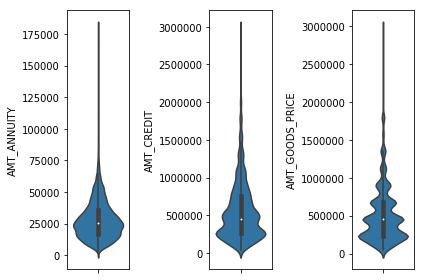

In [120]:
# example of distribution of numerical data

ax1 = plt.subplot(1, 3, 1)
ax1 = sns.violinplot(a.AMT_ANNUITY, orient='v')

ax2 = plt.subplot(1, 3, 2)
ax2 = sns.violinplot(a.AMT_CREDIT, orient='v')

ax3 = plt.subplot(1, 3, 3)
ax3 = sns.violinplot(a.AMT_GOODS_PRICE, orient='v')

_ = plt.tight_layout()

In [121]:
# list numerical cols
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
num_cols = a.select_dtypes(include=numerics).columns.tolist()
num_cols.remove('TARGET')
num_cols

['AMT_ANNUITY',
 'AMT_CREDIT',
 'AMT_GOODS_PRICE',
 'AMT_INCOME_TOTAL',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_YEAR',
 'APARTMENTS_AVG',
 'APARTMENTS_MEDI',
 'APARTMENTS_MODE',
 'BASEMENTAREA_AVG',
 'BASEMENTAREA_MEDI',
 'BASEMENTAREA_MODE',
 'CNT_CHILDREN',
 'CNT_FAM_MEMBERS',
 'COMMONAREA_AVG',
 'COMMONAREA_MEDI',
 'COMMONAREA_MODE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_ID_PUBLISH',
 'DAYS_LAST_PHONE_CHANGE',
 'DAYS_REGISTRATION',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'ELEVATORS_AVG',
 'ELEVATORS_MEDI',
 'ELEVATORS_MODE',
 'EMERGENCYSTATE_MODE',
 'ENTRANCES_AVG',
 'ENTRANCES_MEDI',
 'ENTRANCES_MODE',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'FLAG_CONT_MOBILE',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOC

In [122]:
# don't apply outlier treatment to FLAG like columns

flag_cols = []

for col in num_cols:
    vals = a[col].unique().tolist()
    if len(vals) < 3:
        flag_cols.append(col)
        
num_cols = [x for x in num_cols if x not in flag_cols]
num_cols

['AMT_ANNUITY',
 'AMT_CREDIT',
 'AMT_GOODS_PRICE',
 'AMT_INCOME_TOTAL',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_YEAR',
 'APARTMENTS_AVG',
 'APARTMENTS_MEDI',
 'APARTMENTS_MODE',
 'BASEMENTAREA_AVG',
 'BASEMENTAREA_MEDI',
 'BASEMENTAREA_MODE',
 'CNT_CHILDREN',
 'CNT_FAM_MEMBERS',
 'COMMONAREA_AVG',
 'COMMONAREA_MEDI',
 'COMMONAREA_MODE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_ID_PUBLISH',
 'DAYS_LAST_PHONE_CHANGE',
 'DAYS_REGISTRATION',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'ELEVATORS_AVG',
 'ELEVATORS_MEDI',
 'ELEVATORS_MODE',
 'ENTRANCES_AVG',
 'ENTRANCES_MEDI',
 'ENTRANCES_MODE',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'FLOORSMAX_AVG',
 'FLOORSMAX_MEDI',
 'FLOORSMAX_MODE',
 'FLOORSMIN_AVG',
 'FLOORSMIN_MEDI',
 'FLOORSMIN_MODE',
 'HOUR_APPR_PROCESS_START',
 'LANDAREA_AVG',
 'LANDAREA_MEDI',
 'LANDAREA_MODE',
 'LIVINGA

In [123]:
# treat outliers

for col in num_cols:
    
    # calculate the standard deviation per column
    std_dev = a[col].std()
    
    # calculate the mean per column
    mean = a[col].mean()
    
    # calculate the max and min
    mp = 3
    max = mean + mp * std_dev
    min = mean - mp * std_dev
    
    # if the column is a 'count' column,
    # then it should be an integer
    # and it can't be < 0
    if 'CNT' in col:
        max = round(max,0)
        if min < 0:
            min = 0.0
        else:
            min = round(min,0)
    
    # if value is more than 3 standard deviations from the mean
    # in the positive direction, replace it with that value
    a.loc[a[col] > max, col] = max
    
    # if value is more than 3 standard deviations from the mean
    # in the negative direction, replace it with that value
    a.loc[a[col] < min, col] = min  

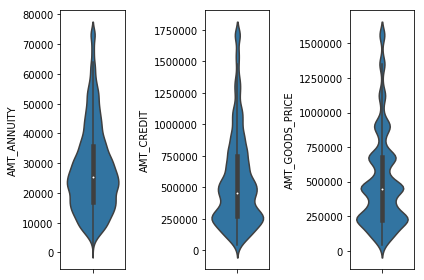

In [124]:
# example of distribution of numerical data after treating outliers

ax1 = plt.subplot(1, 3, 1)
ax1 = sns.violinplot(a.AMT_ANNUITY, orient='v')

ax2 = plt.subplot(1, 3, 2)
ax2 = sns.violinplot(a.AMT_CREDIT, orient='v')

ax3 = plt.subplot(1, 3, 3)
ax3 = sns.violinplot(a.AMT_GOODS_PRICE, orient='v')

_ = plt.tight_layout()

### 2.5.2) Bureau

In [125]:
b.head()

,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
SK_ID_CURR,,,,,,,,,,,,,,,,
215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,0.0,0,91323.0,0.0,0.0,0.0,Consumer credit,-131,0.0
215354,5714463,Active,currency 1,-208,0,1075.0,0.0,0.0,0,225000.0,171342.0,0.0,0.0,Credit card,-20,0.0
215354,5714464,Active,currency 1,-203,0,528.0,0.0,0.0,0,464323.5,0.0,0.0,0.0,Consumer credit,-16,0.0
215354,5714465,Active,currency 1,-203,0,0.0,0.0,0.0,0,90000.0,0.0,0.0,0.0,Credit card,-16,0.0
215354,5714466,Active,currency 1,-629,0,1197.0,0.0,77674.5,0,2700000.0,0.0,0.0,0.0,Consumer credit,-21,0.0


In [126]:
# numerical columns
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
num_cols = b.select_dtypes(include=numerics).columns.tolist()
num_cols.remove('SK_ID_BUREAU')
b[num_cols].head()

,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
SK_ID_CURR,,,,,,,,,,,,
215354,-497,0,-153.0,-153.0,0.0,0,91323.0,0.0,0.0,0.0,-131,0.0
215354,-208,0,1075.0,0.0,0.0,0,225000.0,171342.0,0.0,0.0,-20,0.0
215354,-203,0,528.0,0.0,0.0,0,464323.5,0.0,0.0,0.0,-16,0.0
215354,-203,0,0.0,0.0,0.0,0,90000.0,0.0,0.0,0.0,-16,0.0
215354,-629,0,1197.0,0.0,77674.5,0,2700000.0,0.0,0.0,0.0,-21,0.0


In [127]:
# treat outliers

for col in num_cols:
    
    # calculate the standard deviation per column
    std_dev = b[col].std()
    
    # calculate the mean per column
    mean = b[col].mean()
    
    # calculate the max and min
    mp = 3
    max = mean + mp * std_dev
    min = mean - mp * std_dev
    
    # if the column is a 'count' column,
    # then it should be an integer
    # and it can't be < 0
    if 'CNT' in col:
        max = round(max,0)
        if min < 0:
            min = 0.0
        else:
            min = round(min,0)
    
    # if value is more than 3 standard deviations from the mean
    # in the positive direction, replace it with that value
    b.loc[b[col] > max, col] = max
    
    # if value is more than 3 standard deviations from the mean
    # in the negative direction, replace it with that value
    b.loc[b[col] < min, col] = min  

In [128]:
b[num_cols].head()

,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
SK_ID_CURR,,,,,,,,,,,,
215354,-497.0,0.0,-153.0,-153.0,0.000000,0.0,91323.0,0.0,0.0,0.0,-131.0,0.0
215354,-208.0,0.0,1075.0,0.0,0.000000,0.0,225000.0,171342.0,0.0,0.0,-20.0,0.0
215354,-203.0,0.0,528.0,0.0,0.000000,0.0,464323.5,0.0,0.0,0.0,-16.0,0.0
215354,-203.0,0.0,0.0,0.0,0.000000,0.0,90000.0,0.0,0.0,0.0,-16.0,0.0
215354,-629.0,0.0,1197.0,0.0,44302.048492,0.0,2700000.0,0.0,0.0,0.0,-21.0,0.0


## 2.6) Feature Engineering
---
<a id="ID_2.6"></a>

### 2.6.1) Application_test|train

In [129]:
# does the applicant have children?
a['FLAG_CHILDREN'] = np.where(a['CNT_CHILDREN'] > 0, 1, 0)
a[['CNT_CHILDREN','FLAG_CHILDREN']].head()

,CNT_CHILDREN,FLAG_CHILDREN
SK_ID_CURR,,
100002,0.0,0
100003,0.0,0
100004,0.0,0
100006,0.0,0
100007,0.0,0


In [130]:
# does the applicant have an income?
a['FLAG_INCOME'] = np.where(a['AMT_INCOME_TOTAL'] > 0, 1, 0)
a['FLAG_INCOME_6figs'] = np.where(a['AMT_INCOME_TOTAL'] >= 100000, 1, 0)
a[['AMT_INCOME_TOTAL','FLAG_INCOME','FLAG_INCOME_6figs']].head()

,AMT_INCOME_TOTAL,FLAG_INCOME,FLAG_INCOME_6figs
SK_ID_CURR,,,
100002,202500.0,1,1
100003,270000.0,1,1
100004,67500.0,1,0
100006,135000.0,1,1
100007,121500.0,1,1


In [131]:
# how many documents did they submit?
doc_cols = sorted([x for x in a.columns.tolist() if 'DOCUMENT' in x])
a['CNT_DOC'] = a[doc_cols].sum(axis=1)
doc_cols += ['CNT_DOC']
a[doc_cols].head()

,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,...,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,CNT_DOC
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100002,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
100003,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
100004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
100006,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
100007,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1


In [132]:
# return the unique values in CNT_DOC
cnt_doc = pd.DataFrame(a['CNT_DOC'].value_counts()).sort_index()
cnt_doc

,CNT_DOC
0,1181
1,18599
2,215
3,5


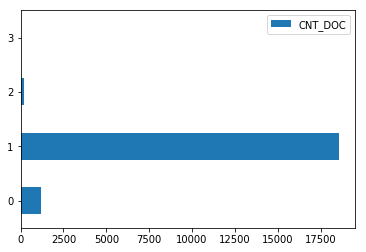

In [133]:
ax = cnt_doc.plot(kind='barh')

## 2.7) Combine Datasets
---
<a id="ID_2.7"></a>

### 2.7.1) Bureau + Bureau Balances

In [134]:
b.head()

,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
SK_ID_CURR,,,,,,,,,,,,,,,,
215354,5714462,Closed,currency 1,-497.0,0.0,-153.0,-153.0,0.000000,0.0,91323.0,0.0,0.0,0.0,Consumer credit,-131.0,0.0
215354,5714463,Active,currency 1,-208.0,0.0,1075.0,0.0,0.000000,0.0,225000.0,171342.0,0.0,0.0,Credit card,-20.0,0.0
215354,5714464,Active,currency 1,-203.0,0.0,528.0,0.0,0.000000,0.0,464323.5,0.0,0.0,0.0,Consumer credit,-16.0,0.0
215354,5714465,Active,currency 1,-203.0,0.0,0.0,0.0,0.000000,0.0,90000.0,0.0,0.0,0.0,Credit card,-16.0,0.0
215354,5714466,Active,currency 1,-629.0,0.0,1197.0,0.0,44302.048492,0.0,2700000.0,0.0,0.0,0.0,Consumer credit,-21.0,0.0


In [135]:
bb.head()

,MONTHS_BALANCE,STATUS
SK_ID_BUREAU,,
5715448,0,C
5715448,-1,C
5715448,-2,C
5715448,-3,C
5715448,-4,C


In [136]:
# compare column headers

cols1 = list(b.columns)
cols1.append(b.index.name)

cols2 = list(bb.columns)
cols2.append(bb.index.name)

new_cols = list(set(cols1).intersection(cols2))
new_cols

['SK_ID_BUREAU']

In [137]:
bb['MONTHS_BALANCE'].unique()

array([  0,  -1,  -2,  -3,  -4,  -5,  -6,  -7,  -8,  -9, -10, -11, -12,
       -13, -14, -15, -16, -17, -18, -19, -20, -21, -22, -23, -24, -25,
       -26, -27, -28, -29, -30, -31, -32, -33, -34, -35, -36, -37, -38,
       -39, -40, -41, -42, -43, -44, -45, -46, -47, -48, -49, -50, -51,
       -52, -53, -54, -55, -56, -57, -58, -59, -60, -61, -62, -63, -64,
       -65, -66, -67, -68, -69, -70, -71, -72, -73, -74, -75, -76, -77,
       -78, -79, -80, -81, -82, -83, -84, -85, -86, -87, -88, -89, -90,
       -91, -92, -93, -94, -95, -96], dtype=int64)

In [138]:
bb['STATUS'].unique()

# C = closed
# X = status unknown
# 0 = no DPD
# 1 = maximal did during month between 1-30
# 2 = DPD 31-60
# 5 = DPD 120+ or sold or written off

[C, 0, X, 1, 2, 3]
Categories (6, object): [C, 0, X, 1, 2, 3]

In [139]:
# pivot the bureau balance dataset so
# the columns are the months and the values are the status

bb_pivot = bb.reset_index()
bb_pivot = bb_pivot.set_index(['SK_ID_BUREAU','MONTHS_BALANCE'])
bb_pivot = bb_pivot.unstack()
bb_pivot.head()

STATUS                                              ...       \
MONTHS_BALANCE    -96  -95  -94  -93  -92  -91  -90  -89  -88  -87 ...  -9    
SK_ID_BUREAU                                                       ...        
5715448           NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN ...    0   
5715449           NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN ...    0   
5715451           NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN ...    C   
5715452           NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN ...    C   
5715453           NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN ...    C   

                                                         
MONTHS_BALANCE -8  -7  -6  -5   -4   -3   -2   -1    0   
SK_ID_BUREAU                                             
5715448          C   C   C   C    C    C    C    C    C  
5715449          0   0   0   C    C    C    C    C    C  
5715451          C   C   C   C  NaN  NaN  NaN  NaN  NaN  
5715452          C   C   C   C    C    C    C    C    C  
5715453          C   C   C   C    C    C    C    C    C  

[5 rows x 97 columns]

In [140]:
# rename the columns for 'bb'

cols = bb_pivot.columns.tolist()
new_cols = []

for col in cols:
    new_cols.append(col[0] + '_' + str(col[1]))

bb_pivot.columns = new_cols
bb_pivot.head()

,STATUS_-96,STATUS_-95,STATUS_-94,STATUS_-93,STATUS_-92,STATUS_-91,STATUS_-90,STATUS_-89,STATUS_-88,STATUS_-87,...,STATUS_-9,STATUS_-8,STATUS_-7,STATUS_-6,STATUS_-5,STATUS_-4,STATUS_-3,STATUS_-2,STATUS_-1,STATUS_0
SK_ID_BUREAU,,,,,,,,,,,,,,,,,,,,,
5715448,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,C,C,C,C,C,C,C,C,C
5715449,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,C,C,C,C,C,C
5715451,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,C,C,C,C,C,NaN,NaN,NaN,NaN,NaN
5715452,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,C,C,C,C,C,C,C,C,C,C
5715453,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,C,C,C,C,C,C,C,C,C,C


In [141]:
# create a new column finding the mode of all the other columns
bb_pivot['mode'] = bb_pivot.mode(axis=1)[0]
bb_pivot.head()

,STATUS_-96,STATUS_-95,STATUS_-94,STATUS_-93,STATUS_-92,STATUS_-91,STATUS_-90,STATUS_-89,STATUS_-88,STATUS_-87,...,STATUS_-8,STATUS_-7,STATUS_-6,STATUS_-5,STATUS_-4,STATUS_-3,STATUS_-2,STATUS_-1,STATUS_0,mode
SK_ID_BUREAU,,,,,,,,,,,,,,,,,,,,,
5715448,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,C,C,C,C,C,C,C,C,C,X
5715449,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,C,C,C,C,C,C,C
5715451,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,C,C,C,C,NaN,NaN,NaN,NaN,NaN,0
5715452,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,C,C,C,C,C,C,C,C,C,C
5715453,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,C,C,C,C,C,C,C,C,C,C


In [142]:

bb_pivot = bb_pivot.fillna(-1)
bb_pivot.head()

,STATUS_-96,STATUS_-95,STATUS_-94,STATUS_-93,STATUS_-92,STATUS_-91,STATUS_-90,STATUS_-89,STATUS_-88,STATUS_-87,...,STATUS_-8,STATUS_-7,STATUS_-6,STATUS_-5,STATUS_-4,STATUS_-3,STATUS_-2,STATUS_-1,STATUS_0,mode
SK_ID_BUREAU,,,,,,,,,,,,,,,,,,,,,
5715448,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,C,C,C,C,C,C,C,C,C,X
5715449,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,0,0,0,C,C,C,C,C,C,C
5715451,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,C,C,C,C,-1,-1,-1,-1,-1,0
5715452,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,C,C,C,C,C,C,C,C,C,C
5715453,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,C,C,C,C,C,C,C,C,C,C


In [143]:
b = b.reset_index()
b.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497.0,0.0,-153.0,-153.0,0.000000,0.0,91323.0,0.0,0.0,0.0,Consumer credit,-131.0,0.0
1,215354,5714463,Active,currency 1,-208.0,0.0,1075.0,0.0,0.000000,0.0,225000.0,171342.0,0.0,0.0,Credit card,-20.0,0.0
2,215354,5714464,Active,currency 1,-203.0,0.0,528.0,0.0,0.000000,0.0,464323.5,0.0,0.0,0.0,Consumer credit,-16.0,0.0
3,215354,5714465,Active,currency 1,-203.0,0.0,0.0,0.0,0.000000,0.0,90000.0,0.0,0.0,0.0,Credit card,-16.0,0.0
4,215354,5714466,Active,currency 1,-629.0,0.0,1197.0,0.0,44302.048492,0.0,2700000.0,0.0,0.0,0.0,Consumer credit,-21.0,0.0


In [144]:
# merge the bureau and bureau balance datasets

b_bb = pd.merge(b, bb_pivot, how='left', on='SK_ID_BUREAU', sort=True)
b_bb = b_bb.set_index('SK_ID_CURR')
b_bb.head()

,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,...,STATUS_-8,STATUS_-7,STATUS_-6,STATUS_-5,STATUS_-4,STATUS_-3,STATUS_-2,STATUS_-1,STATUS_0,mode
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
215354,5714462,Closed,currency 1,-497.0,0.0,-153.0,-153.0,0.000000,0.0,91323.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
215354,5714463,Active,currency 1,-208.0,0.0,1075.0,0.0,0.000000,0.0,225000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
215354,5714464,Active,currency 1,-203.0,0.0,528.0,0.0,0.000000,0.0,464323.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
215354,5714465,Active,currency 1,-203.0,0.0,0.0,0.0,0.000000,0.0,90000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
215354,5714466,Active,currency 1,-629.0,0.0,1197.0,0.0,44302.048492,0.0,2700000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [145]:
status_cols = [x for x in b_bb.columns.tolist() if 'STATUS' in x]
status_cols.append('mode')
b_bb[status_cols] = b_bb[status_cols].fillna(-1)

for col in status_cols:
    b_bb[col].astype('category')

In [146]:
b_bb[b_bb.columns[b_bb.isnull().any()]].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 215354 to 215641
Empty DataFrame

In [147]:
b_bb.head()

,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,...,STATUS_-8,STATUS_-7,STATUS_-6,STATUS_-5,STATUS_-4,STATUS_-3,STATUS_-2,STATUS_-1,STATUS_0,mode
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
215354,5714462,Closed,currency 1,-497.0,0.0,-153.0,-153.0,0.000000,0.0,91323.0,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
215354,5714463,Active,currency 1,-208.0,0.0,1075.0,0.0,0.000000,0.0,225000.0,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
215354,5714464,Active,currency 1,-203.0,0.0,528.0,0.0,0.000000,0.0,464323.5,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
215354,5714465,Active,currency 1,-203.0,0.0,0.0,0.0,0.000000,0.0,90000.0,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
215354,5714466,Active,currency 1,-629.0,0.0,1197.0,0.0,44302.048492,0.0,2700000.0,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1


In [148]:
b_bb_group = b_bb.groupby(['SK_ID_CURR', 'CREDIT_ACTIVE']).count()['SK_ID_BUREAU'].to_frame()
b_bb_group.head()

SK_ID_BUREAU
SK_ID_CURR CREDIT_ACTIVE              
100053     Active                  1.0
           Bad debt                NaN
           Closed                  6.0
           Sold                    NaN
100568     Active                  3.0

In [149]:
b_bb_group = b_bb_group.unstack()
b_bb_group.head()

SK_ID_BUREAU                     
CREDIT_ACTIVE       Active Bad debt Closed Sold
SK_ID_CURR                                     
100053                 1.0      NaN    6.0  NaN
100568                 3.0      NaN    4.0  NaN
100653                 4.0      NaN    3.0  NaN
100802                 1.0      NaN    NaN  NaN
100819                 6.0      NaN   12.0  NaN

In [150]:
b_bb_group = b_bb_group.fillna(0)
b_bb_group.columns = ['ACTIVE', 'BAD_DEBT', 'CLOSED', 'SOLD']
b_bb_group['TOTAL_LOANS'] = b_bb_group.sum(axis=1)
b_bb_group.head()

,ACTIVE,BAD_DEBT,CLOSED,SOLD,TOTAL_LOANS
SK_ID_CURR,,,,,
100053,1.0,0.0,6.0,0.0,7.0
100568,3.0,0.0,4.0,0.0,7.0
100653,4.0,0.0,3.0,0.0,7.0
100802,1.0,0.0,0.0,0.0,1.0
100819,6.0,0.0,12.0,0.0,18.0


In [151]:
b_bb.CREDIT_CURRENCY.unique()

[currency 1, currency 2, currency 4]
Categories (3, object): [currency 1, currency 2, currency 4]

In [152]:
temp = b_bb.groupby(['SK_ID_CURR', 'CREDIT_CURRENCY']).count()['SK_ID_BUREAU'].to_frame()
temp.head()

SK_ID_BUREAU
SK_ID_CURR CREDIT_CURRENCY              
100053     currency 1                7.0
           currency 2                NaN
           currency 4                NaN
100568     currency 1                7.0
           currency 2                NaN

In [153]:
temp = temp.sort_values(['SK_ID_CURR', 'CREDIT_CURRENCY'])
temp = temp.groupby(['SK_ID_CURR']).head(1).reset_index(level=1)['CREDIT_CURRENCY'].to_frame()
temp.head()

,CREDIT_CURRENCY
SK_ID_CURR,
100053,currency 1
100568,currency 1
100653,currency 1
100802,currency 1
100819,currency 1


In [154]:
temp.index.is_unique

True

In [155]:
b_bb_group = pd.merge(b_bb_group, temp, how='left', on='SK_ID_CURR')
b_bb_group.head()

,ACTIVE,BAD_DEBT,CLOSED,SOLD,TOTAL_LOANS,CREDIT_CURRENCY
SK_ID_CURR,,,,,,
100053,1.0,0.0,6.0,0.0,7.0,currency 1
100568,3.0,0.0,4.0,0.0,7.0,currency 1
100653,4.0,0.0,3.0,0.0,7.0,currency 1
100802,1.0,0.0,0.0,0.0,1.0,currency 1
100819,6.0,0.0,12.0,0.0,18.0,currency 1


In [156]:
num_cols = ['DAYS_CREDIT',
            'CREDIT_DAY_OVERDUE',
            'DAYS_CREDIT_ENDDATE',
            'DAYS_ENDDATE_FACT',
            'AMT_CREDIT_MAX_OVERDUE',
            'CNT_CREDIT_PROLONG',
            'AMT_CREDIT_SUM',
            'AMT_CREDIT_SUM_DEBT',
            'AMT_CREDIT_SUM_LIMIT',
            'AMT_CREDIT_SUM_OVERDUE',
            'CREDIT_TYPE',
            'DAYS_CREDIT_UPDATE',
            'AMT_ANNUITY']

b_bb[num_cols].head()

,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
SK_ID_CURR,,,,,,,,,,,,,
215354,-497.0,0.0,-153.0,-153.0,0.000000,0.0,91323.0,0.0,0.0,0.0,Consumer credit,-131.0,0.0
215354,-208.0,0.0,1075.0,0.0,0.000000,0.0,225000.0,171342.0,0.0,0.0,Credit card,-20.0,0.0
215354,-203.0,0.0,528.0,0.0,0.000000,0.0,464323.5,0.0,0.0,0.0,Consumer credit,-16.0,0.0
215354,-203.0,0.0,0.0,0.0,0.000000,0.0,90000.0,0.0,0.0,0.0,Credit card,-16.0,0.0
215354,-629.0,0.0,1197.0,0.0,44302.048492,0.0,2700000.0,0.0,0.0,0.0,Consumer credit,-21.0,0.0


In [157]:
temp = b_bb[num_cols].groupby(level=0).mean()
temp.head()

,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
SK_ID_CURR,,,,,,,,,,,,
100053,-2287.714286,0.0,-1302.285714,-1231.428571,0.000000,0.0,92655.642857,0.000000,0.000,0.0,-1137.571429,0.000000
100568,-493.857143,0.0,94.714286,-216.285714,1168.412143,0.0,119269.877143,60371.357143,0.000,0.0,-244.857143,3364.071429
100653,-1237.571429,0.0,-253.142857,-737.000000,0.000000,0.0,124783.200000,65253.060000,0.000,0.0,-536.285714,0.000000
100802,-525.000000,0.0,928.000000,0.000000,0.000000,0.0,157500.000000,157630.500000,0.000,0.0,-25.000000,0.000000
100819,-917.555556,0.0,-305.055556,-521.277778,0.000000,0.0,232115.200000,77986.105000,61.935,0.0,-487.888889,0.000000


In [158]:
b_bb_group = pd.merge(b_bb_group, temp, how='left', on='SK_ID_CURR')
b_bb_group.head()

,ACTIVE,BAD_DEBT,CLOSED,SOLD,TOTAL_LOANS,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
SK_ID_CURR,,,,,,,,,,,,,,,,,,
100053,1.0,0.0,6.0,0.0,7.0,currency 1,-2287.714286,0.0,-1302.285714,-1231.428571,0.000000,0.0,92655.642857,0.000000,0.000,0.0,-1137.571429,0.000000
100568,3.0,0.0,4.0,0.0,7.0,currency 1,-493.857143,0.0,94.714286,-216.285714,1168.412143,0.0,119269.877143,60371.357143,0.000,0.0,-244.857143,3364.071429
100653,4.0,0.0,3.0,0.0,7.0,currency 1,-1237.571429,0.0,-253.142857,-737.000000,0.000000,0.0,124783.200000,65253.060000,0.000,0.0,-536.285714,0.000000
100802,1.0,0.0,0.0,0.0,1.0,currency 1,-525.000000,0.0,928.000000,0.000000,0.000000,0.0,157500.000000,157630.500000,0.000,0.0,-25.000000,0.000000
100819,6.0,0.0,12.0,0.0,18.0,currency 1,-917.555556,0.0,-305.055556,-521.277778,0.000000,0.0,232115.200000,77986.105000,61.935,0.0,-487.888889,0.000000


In [159]:
temp = b_bb[status_cols].groupby(level=0).agg(pd.Series.mode)
temp.head()

C:\Users\Miles\Anaconda3\lib\site-packages\pandas\core\algorithms.py:838: UserWarning: Unable to sort modes: '>' not supported between instances of 'str' and 'int'
  warn("Unable to sort modes: {error}".format(error=e))
C:\Users\Miles\Anaconda3\lib\site-packages\pandas\core\algorithms.py:838: UserWarning: Unable to sort modes: '>' not supported between instances of 'str' and 'int'
  warn("Unable to sort modes: {error}".format(error=e))
C:\Users\Miles\Anaconda3\lib\site-packages\pandas\core\algorithms.py:838: UserWarning: Unable to sort modes: '>' not supported between instances of 'str' and 'int'
  warn("Unable to sort modes: {error}".format(error=e))
C:\Users\Miles\Anaconda3\lib\site-packages\pandas\core\algorithms.py:838: UserWarning: Unable to sort modes: '>' not supported between instances of 'str' and 'int'
  warn("Unable to sort modes: {error}".format(error=e))
C:\Users\Miles\Anaconda3\lib\site-packages\pandas\core\algorithms.py:838: UserWarning: Unable to sort modes: '>' not sup

C:\Users\Miles\Anaconda3\lib\site-packages\pandas\core\algorithms.py:838: UserWarning: Unable to sort modes: '>' not supported between instances of 'str' and 'int'
  warn("Unable to sort modes: {error}".format(error=e))
C:\Users\Miles\Anaconda3\lib\site-packages\pandas\core\algorithms.py:838: UserWarning: Unable to sort modes: '>' not supported between instances of 'str' and 'int'
  warn("Unable to sort modes: {error}".format(error=e))
C:\Users\Miles\Anaconda3\lib\site-packages\pandas\core\algorithms.py:838: UserWarning: Unable to sort modes: '>' not supported between instances of 'str' and 'int'
  warn("Unable to sort modes: {error}".format(error=e))
C:\Users\Miles\Anaconda3\lib\site-packages\pandas\core\algorithms.py:838: UserWarning: Unable to sort modes: '>' not supported between instances of 'str' and 'int'
  warn("Unable to sort modes: {error}".format(error=e))
C:\Users\Miles\Anaconda3\lib\site-packages\pandas\core\algorithms.py:838: UserWarning: Unable to sort modes: '>' not sup

C:\Users\Miles\Anaconda3\lib\site-packages\pandas\core\algorithms.py:838: UserWarning: Unable to sort modes: '>' not supported between instances of 'str' and 'int'
  warn("Unable to sort modes: {error}".format(error=e))
C:\Users\Miles\Anaconda3\lib\site-packages\pandas\core\algorithms.py:838: UserWarning: Unable to sort modes: '>' not supported between instances of 'str' and 'int'
  warn("Unable to sort modes: {error}".format(error=e))
C:\Users\Miles\Anaconda3\lib\site-packages\pandas\core\algorithms.py:838: UserWarning: Unable to sort modes: '>' not supported between instances of 'str' and 'int'
  warn("Unable to sort modes: {error}".format(error=e))
C:\Users\Miles\Anaconda3\lib\site-packages\pandas\core\algorithms.py:838: UserWarning: Unable to sort modes: '>' not supported between instances of 'str' and 'int'
  warn("Unable to sort modes: {error}".format(error=e))
C:\Users\Miles\Anaconda3\lib\site-packages\pandas\core\algorithms.py:838: UserWarning: Unable to sort modes: '>' not sup

C:\Users\Miles\Anaconda3\lib\site-packages\pandas\core\algorithms.py:838: UserWarning: Unable to sort modes: '>' not supported between instances of 'str' and 'int'
  warn("Unable to sort modes: {error}".format(error=e))
C:\Users\Miles\Anaconda3\lib\site-packages\pandas\core\algorithms.py:838: UserWarning: Unable to sort modes: '>' not supported between instances of 'str' and 'int'
  warn("Unable to sort modes: {error}".format(error=e))
C:\Users\Miles\Anaconda3\lib\site-packages\pandas\core\algorithms.py:838: UserWarning: Unable to sort modes: '>' not supported between instances of 'str' and 'int'
  warn("Unable to sort modes: {error}".format(error=e))
C:\Users\Miles\Anaconda3\lib\site-packages\pandas\core\algorithms.py:838: UserWarning: Unable to sort modes: '>' not supported between instances of 'str' and 'int'
  warn("Unable to sort modes: {error}".format(error=e))
C:\Users\Miles\Anaconda3\lib\site-packages\pandas\core\algorithms.py:838: UserWarning: Unable to sort modes: '>' not sup

C:\Users\Miles\Anaconda3\lib\site-packages\pandas\core\algorithms.py:838: UserWarning: Unable to sort modes: '>' not supported between instances of 'str' and 'int'
  warn("Unable to sort modes: {error}".format(error=e))
C:\Users\Miles\Anaconda3\lib\site-packages\pandas\core\algorithms.py:838: UserWarning: Unable to sort modes: '>' not supported between instances of 'str' and 'int'
  warn("Unable to sort modes: {error}".format(error=e))
C:\Users\Miles\Anaconda3\lib\site-packages\pandas\core\algorithms.py:838: UserWarning: Unable to sort modes: '>' not supported between instances of 'str' and 'int'
  warn("Unable to sort modes: {error}".format(error=e))
C:\Users\Miles\Anaconda3\lib\site-packages\pandas\core\algorithms.py:838: UserWarning: Unable to sort modes: '>' not supported between instances of 'str' and 'int'
  warn("Unable to sort modes: {error}".format(error=e))
C:\Users\Miles\Anaconda3\lib\site-packages\pandas\core\algorithms.py:838: UserWarning: Unable to sort modes: '>' not sup

C:\Users\Miles\Anaconda3\lib\site-packages\pandas\core\algorithms.py:838: UserWarning: Unable to sort modes: '>' not supported between instances of 'str' and 'int'
  warn("Unable to sort modes: {error}".format(error=e))
C:\Users\Miles\Anaconda3\lib\site-packages\pandas\core\algorithms.py:838: UserWarning: Unable to sort modes: '>' not supported between instances of 'str' and 'int'
  warn("Unable to sort modes: {error}".format(error=e))
C:\Users\Miles\Anaconda3\lib\site-packages\pandas\core\algorithms.py:838: UserWarning: Unable to sort modes: '>' not supported between instances of 'str' and 'int'
  warn("Unable to sort modes: {error}".format(error=e))
C:\Users\Miles\Anaconda3\lib\site-packages\pandas\core\algorithms.py:838: UserWarning: Unable to sort modes: '>' not supported between instances of 'str' and 'int'
  warn("Unable to sort modes: {error}".format(error=e))
C:\Users\Miles\Anaconda3\lib\site-packages\pandas\core\algorithms.py:838: UserWarning: Unable to sort modes: '>' not sup

C:\Users\Miles\Anaconda3\lib\site-packages\pandas\core\algorithms.py:838: UserWarning: Unable to sort modes: '>' not supported between instances of 'str' and 'int'
  warn("Unable to sort modes: {error}".format(error=e))
C:\Users\Miles\Anaconda3\lib\site-packages\pandas\core\algorithms.py:838: UserWarning: Unable to sort modes: '>' not supported between instances of 'str' and 'int'
  warn("Unable to sort modes: {error}".format(error=e))
C:\Users\Miles\Anaconda3\lib\site-packages\pandas\core\algorithms.py:838: UserWarning: Unable to sort modes: '>' not supported between instances of 'str' and 'int'
  warn("Unable to sort modes: {error}".format(error=e))
C:\Users\Miles\Anaconda3\lib\site-packages\pandas\core\algorithms.py:838: UserWarning: Unable to sort modes: '>' not supported between instances of 'str' and 'int'
  warn("Unable to sort modes: {error}".format(error=e))
C:\Users\Miles\Anaconda3\lib\site-packages\pandas\core\algorithms.py:838: UserWarning: Unable to sort modes: '>' not sup

C:\Users\Miles\Anaconda3\lib\site-packages\pandas\core\algorithms.py:838: UserWarning: Unable to sort modes: '>' not supported between instances of 'str' and 'int'
  warn("Unable to sort modes: {error}".format(error=e))
C:\Users\Miles\Anaconda3\lib\site-packages\pandas\core\algorithms.py:838: UserWarning: Unable to sort modes: '>' not supported between instances of 'str' and 'int'
  warn("Unable to sort modes: {error}".format(error=e))
C:\Users\Miles\Anaconda3\lib\site-packages\pandas\core\algorithms.py:838: UserWarning: Unable to sort modes: '>' not supported between instances of 'str' and 'int'
  warn("Unable to sort modes: {error}".format(error=e))
C:\Users\Miles\Anaconda3\lib\site-packages\pandas\core\algorithms.py:838: UserWarning: Unable to sort modes: '>' not supported between instances of 'str' and 'int'
  warn("Unable to sort modes: {error}".format(error=e))
C:\Users\Miles\Anaconda3\lib\site-packages\pandas\core\algorithms.py:838: UserWarning: Unable to sort modes: '>' not sup

,STATUS_-96,STATUS_-95,STATUS_-94,STATUS_-93,STATUS_-92,STATUS_-91,STATUS_-90,STATUS_-89,STATUS_-88,STATUS_-87,...,STATUS_-8,STATUS_-7,STATUS_-6,STATUS_-5,STATUS_-4,STATUS_-3,STATUS_-2,STATUS_-1,STATUS_0,mode
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100053,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
100568,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
100653,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
100802,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
100819,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1


In [160]:
b_bb_group = pd.merge(b_bb_group, temp, how='left', on='SK_ID_CURR')
b_bb_group.head()

,ACTIVE,BAD_DEBT,CLOSED,SOLD,TOTAL_LOANS,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,...,STATUS_-8,STATUS_-7,STATUS_-6,STATUS_-5,STATUS_-4,STATUS_-3,STATUS_-2,STATUS_-1,STATUS_0,mode
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100053,1.0,0.0,6.0,0.0,7.0,currency 1,-2287.714286,0.0,-1302.285714,-1231.428571,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
100568,3.0,0.0,4.0,0.0,7.0,currency 1,-493.857143,0.0,94.714286,-216.285714,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
100653,4.0,0.0,3.0,0.0,7.0,currency 1,-1237.571429,0.0,-253.142857,-737.000000,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
100802,1.0,0.0,0.0,0.0,1.0,currency 1,-525.000000,0.0,928.000000,0.000000,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
100819,6.0,0.0,12.0,0.0,18.0,currency 1,-917.555556,0.0,-305.055556,-521.277778,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1


In [161]:
b_bb_group[b_bb_group.columns[b_bb_group.isnull().any()]].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2011 entries, 100053 to 456116
Empty DataFrame

### 2.7.2) Combined DF

In [162]:
# if only the application is used moving forward
# df_comb = a.copy()

In [163]:
a.head()

,AMT_ANNUITY,AMT_CREDIT,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_YEAR,...,YEARS_BEGINEXPLUATATION_AVG,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_AVG,YEARS_BUILD_MEDI,YEARS_BUILD_MODE,FLAG_CHILDREN,FLAG_INCOME,FLAG_INCOME_6figs,CNT_DOC
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100002,24700.5,406597.5,351000.0,202500.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.972200,0.9722,0.9722,0.61920,0.6243,0.6341,0,1,1,1
100003,35698.5,1293502.5,1129500.0,270000.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.985100,0.9851,0.9851,0.79600,0.7987,0.8040,0,1,1,1
100004,6750.0,135000.0,135000.0,67500.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.979107,0.9816,0.9851,0.75083,0.7585,0.8301,0,1,0,0
100006,29686.5,312682.5,297000.0,135000.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.979107,0.9816,0.9851,0.75083,0.7585,0.8301,0,1,1,1
100007,21865.5,513000.0,513000.0,121500.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.979107,0.9816,0.9851,0.75083,0.7585,0.8301,0,1,1,1


In [164]:
b_bb_group.head()

,ACTIVE,BAD_DEBT,CLOSED,SOLD,TOTAL_LOANS,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,...,STATUS_-8,STATUS_-7,STATUS_-6,STATUS_-5,STATUS_-4,STATUS_-3,STATUS_-2,STATUS_-1,STATUS_0,mode
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100053,1.0,0.0,6.0,0.0,7.0,currency 1,-2287.714286,0.0,-1302.285714,-1231.428571,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
100568,3.0,0.0,4.0,0.0,7.0,currency 1,-493.857143,0.0,94.714286,-216.285714,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
100653,4.0,0.0,3.0,0.0,7.0,currency 1,-1237.571429,0.0,-253.142857,-737.000000,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
100802,1.0,0.0,0.0,0.0,1.0,currency 1,-525.000000,0.0,928.000000,0.000000,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
100819,6.0,0.0,12.0,0.0,18.0,currency 1,-917.555556,0.0,-305.055556,-521.277778,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1


In [165]:
df_comb = pd.merge(a, b_bb_group, how='left', on='SK_ID_CURR')

In [166]:
# df_comb is the df to be used moving forward
df_comb.head()

,AMT_ANNUITY_x,AMT_CREDIT,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_YEAR,...,STATUS_-8,STATUS_-7,STATUS_-6,STATUS_-5,STATUS_-4,STATUS_-3,STATUS_-2,STATUS_-1,STATUS_0,mode
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100002,24700.5,406597.5,351000.0,202500.0,0.0,0.0,0.0,0.0,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100003,35698.5,1293502.5,1129500.0,270000.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100004,6750.0,135000.0,135000.0,67500.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100006,29686.5,312682.5,297000.0,135000.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100007,21865.5,513000.0,513000.0,121500.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [167]:
df_comb[status_cols] = df_comb[status_cols].fillna(-1)
df_comb.head()

,AMT_ANNUITY_x,AMT_CREDIT,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_YEAR,...,STATUS_-8,STATUS_-7,STATUS_-6,STATUS_-5,STATUS_-4,STATUS_-3,STATUS_-2,STATUS_-1,STATUS_0,mode
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100002,24700.5,406597.5,351000.0,202500.0,0.0,0.0,0.0,0.0,0.0,1.0,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
100003,35698.5,1293502.5,1129500.0,270000.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
100004,6750.0,135000.0,135000.0,67500.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
100006,29686.5,312682.5,297000.0,135000.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
100007,21865.5,513000.0,513000.0,121500.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1


In [168]:
remain_cols = df_comb[df_comb.columns[df_comb.isnull().any()]].columns.tolist()
remain_cols.remove('TARGET')
remain_cols.remove('CREDIT_CURRENCY')
df_comb[remain_cols] = df_comb[remain_cols].fillna(0)

In [169]:
df_comb['CREDIT_CURRENCY'] = df_comb['CREDIT_CURRENCY'].cat.add_categories(['unknown currency'])
df_comb['CREDIT_CURRENCY'] = df_comb['CREDIT_CURRENCY'].replace(np.nan, 'unknown currency', regex=True)
df_comb['CREDIT_CURRENCY'] = df_comb['CREDIT_CURRENCY'].cat.remove_unused_categories()

df_comb[['CREDIT_CURRENCY']].head()

,CREDIT_CURRENCY
SK_ID_CURR,
100002,unknown currency
100003,unknown currency
100004,unknown currency
100006,unknown currency
100007,unknown currency


In [170]:
df_comb.head()

,AMT_ANNUITY_x,AMT_CREDIT,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_YEAR,...,STATUS_-8,STATUS_-7,STATUS_-6,STATUS_-5,STATUS_-4,STATUS_-3,STATUS_-2,STATUS_-1,STATUS_0,mode
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100002,24700.5,406597.5,351000.0,202500.0,0.0,0.0,0.0,0.0,0.0,1.0,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
100003,35698.5,1293502.5,1129500.0,270000.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
100004,6750.0,135000.0,135000.0,67500.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
100006,29686.5,312682.5,297000.0,135000.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
100007,21865.5,513000.0,513000.0,121500.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1


In [171]:
df_comb[df_comb.columns[df_comb.isnull().any()]].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 100002 to 172574
Data columns (total 1 columns):
TARGET    10000 non-null float64
dtypes: float64(1)
memory usage: 312.5 KB


## 2.8) Exploratory Data Analysis
---
<a id="ID_2.8"></a>

### 2.8.1) Correlation Matrix

,AMT_ANNUITY_x,AMT_CREDIT,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_YEAR,...,STATUS_-66,STATUS_-65,STATUS_-64,STATUS_-63,STATUS_-62,STATUS_-61,STATUS_-60,STATUS_-59,STATUS_-58,STATUS_-57
AMT_ANNUITY_x,1.000000,0.772519,0.777252,0.492253,0.016588,0.015219,0.018853,0.028791,0.016913,-0.004761,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AMT_CREDIT,0.772519,1.000000,0.987457,0.406373,0.022298,0.010677,0.085961,-0.008802,0.021225,0.000727,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AMT_GOODS_PRICE,0.777252,0.987457,1.000000,0.411166,0.022535,0.011313,0.086302,-0.009478,0.023266,-0.002451,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AMT_INCOME_TOTAL,0.492253,0.406373,0.411166,1.000000,0.013148,0.019348,0.047379,0.030663,0.009470,0.056421,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AMT_REQ_CREDIT_BUREAU_DAY,0.016588,0.022298,0.022535,0.013148,1.000000,0.201643,0.005738,-0.001875,0.090858,0.015172,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AMT_REQ_CREDIT_BUREAU_HOUR,0.015219,0.010677,0.011313,0.019348,0.201643,1.000000,0.002117,-0.004862,0.036596,0.012545,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AMT_REQ_CREDIT_BUREAU_MON,0.018853,0.085961,0.086302,0.047379,0.005738,0.002117,1.000000,-0.057671,0.009279,0.038569,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AMT_REQ_CREDIT_BUREAU_QRT,0.028791,-0.008802,-0.009478,0.030663,-0.001875,-0.004862,-0.057671,1.000000,-0.016654,0.119953,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AMT_REQ_CREDIT_BUREAU_WEEK,0.016913,0.021225,0.023266,0.009470,0.090858,0.036596,0.009279,-0.016654,1.000000,0.022602,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AMT_REQ_CREDIT_BUREAU_YEAR,-0.004761,0.000727,-0.002451,0.056421,0.015172,0.012545,0.038569,0.119953,0.022602,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


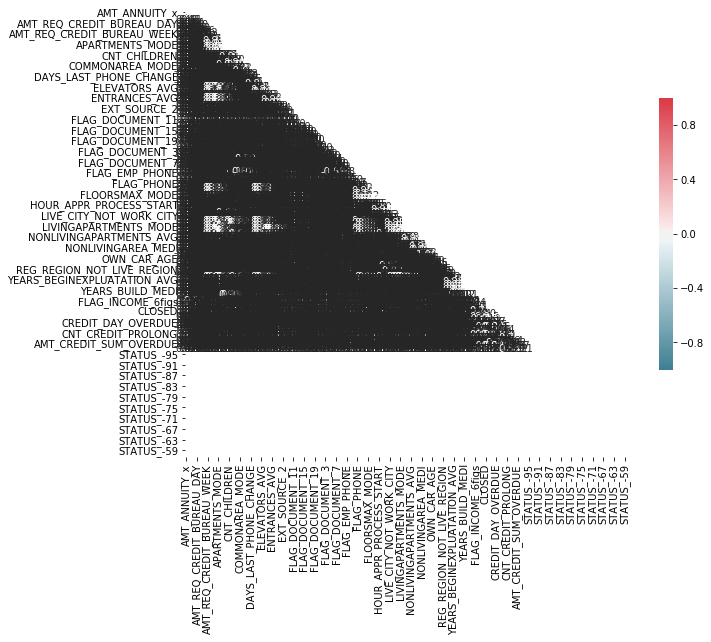

In [172]:
# compute the correlation matrix
corr = df_comb.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10,10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
_ = sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt='.2f')

corr

In [173]:
corr_filter = pd.DataFrame(corr.stack()) # convert columns names into row values
corr_filter.reset_index(inplace=True) # convert the multi index into new cols
corr_filter.columns = ['var_1', 'var_2', 'corr'] # set column names

corr_filter['var_min'] = np.minimum(corr_filter['var_1'], corr_filter['var_2'])
corr_filter['var_max'] = np.maximum(corr_filter['var_1'], corr_filter['var_2'])
corr_filter['var_comb'] = corr_filter['var_min'] + '_+_' + corr_filter['var_max']
corr_filter = corr_filter.drop_duplicates('var_comb')
corr_filter = corr_filter[['var_comb','var_1', 'var_2', 'corr']]

corr_filter = corr_filter[corr_filter['var_1'] != corr_filter['var_2']] # remove a:a correlation
filt = 0.995 # set filter min for correlation value
corr_filter = corr_filter[(corr_filter['corr']>filt) 
                          | (corr_filter['corr']<-1*filt)] # apply filter

corr_filter['corr_abs'] = corr_filter['corr'].abs()
corr_filter = corr_filter.sort_values(by=['corr_abs'])
corr_filter = corr_filter.drop('corr_abs', axis=1)

corr_filter

,var_comb,var_1,var_2,corr
11978,YEARS_BUILD_AVG_+_YEARS_BUILD_MEDI,YEARS_BUILD_AVG,YEARS_BUILD_MEDI,0.997898
10406,OBS_30_CNT_SOCIAL_CIRCLE_+_OBS_60_CNT_SOCIAL_C...,OBS_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,0.998573
2697,DAYS_EMPLOYED_+_FLAG_EMP_PHONE,DAYS_EMPLOYED,FLAG_EMP_PHONE,-0.999723


In [174]:
corr_final = corr_filter[['var_comb','corr']]
corr_final

,var_comb,corr
11978,YEARS_BUILD_AVG_+_YEARS_BUILD_MEDI,0.997898
10406,OBS_30_CNT_SOCIAL_CIRCLE_+_OBS_60_CNT_SOCIAL_C...,0.998573
2697,DAYS_EMPLOYED_+_FLAG_EMP_PHONE,-0.999723


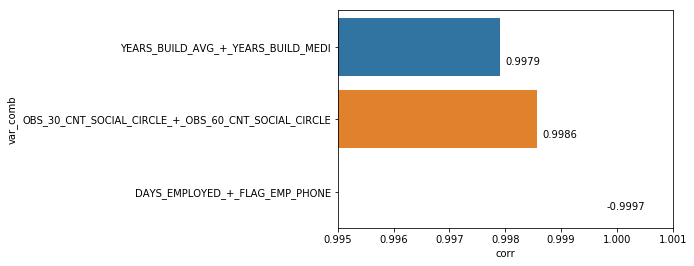

In [175]:
ax = sns.barplot(x='corr', y='var_comb', data=corr_final)

count = 0
for index, row in corr_final.iterrows():
    ax.text(abs(row['corr'])+.0001, count+0.25, 
        round(row['corr'],4), 
        ha='left',
        fontsize=10)
    count += 1

_ = plt.xlim([0.995,1.001])

### 2.8.2) TARGET Distribution

In [176]:
target_0, target_1 = df_comb['TARGET'].value_counts()
df_comb['TARGET'].value_counts()

0.0    9225
1.0     775
Name: TARGET, dtype: int64

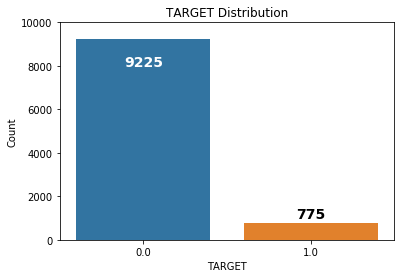

In [177]:
ax = sns.countplot(df_comb['TARGET'])
_ = plt.title('TARGET Distribution')
_ = plt.ylabel('Count')
_ = plt.ylim([0, 10000])


_ = ax.text(0, 8000, 
        str(target_0), 
        ha='center',
        fontsize=14, 
        fontweight='bold', 
        color='white')

_ = ax.text(1, 1000, 
        str(target_1), 
        ha='center',
        fontsize=14, 
        fontweight='bold')

### 2.8.3) CNT_CHILDREN vs. TARGET

In [178]:
# df_comb[['CNT_CHILDREN','TARGET']].value_counts()
child_tar = df_comb[['CNT_CHILDREN','TARGET']].groupby(['CNT_CHILDREN']).mean()
child_tar

,TARGET
CNT_CHILDREN,
0.0,0.071653
1.0,0.085700
2.0,0.105642
3.0,0.084416


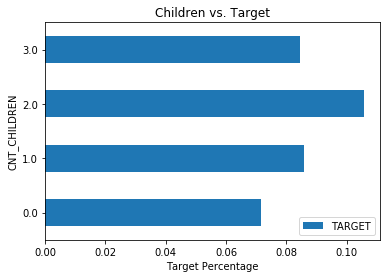

In [179]:
_ = child_tar.plot(kind='barh')
_ = plt.title('Children vs. Target')
_ = plt.xlabel('Target Percentage')

## 2.9) Encoding
---
<a id="ID_2.9"></a>

In [180]:
# save the train_test split because it's lost when one-hot encoding
# then add it back into the table later to use to split the data into train and test df
tt_split = df_comb['TRAIN_TEST']

In [181]:
cat_cols = list(df_comb.select_dtypes(include='category').columns)
df_comb[cat_cols].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 100002 to 172574
Data columns (total 16 columns):
CODE_GENDER                    20000 non-null category
FONDKAPREMONT_MODE             20000 non-null category
HOUSETYPE_MODE                 20000 non-null category
NAME_CONTRACT_TYPE             20000 non-null category
NAME_EDUCATION_TYPE            20000 non-null category
NAME_FAMILY_STATUS             20000 non-null category
NAME_HOUSING_TYPE              20000 non-null category
NAME_INCOME_TYPE               20000 non-null category
NAME_TYPE_SUITE                20000 non-null category
OCCUPATION_TYPE                20000 non-null category
ORGANIZATION_TYPE              20000 non-null category
REGION_RATING_CLIENT           20000 non-null category
REGION_RATING_CLIENT_W_CITY    20000 non-null category
WALLSMATERIAL_MODE             20000 non-null category
WEEKDAY_APPR_PROCESS_START     20000 non-null category
CREDIT_CURRENCY                20000 non-null category
dtype

In [182]:
# print columns and the num of unique values
for col in cat_cols:
    print(col, ':', len(df_comb[col].unique()))

CODE_GENDER : 2
FONDKAPREMONT_MODE : 4
HOUSETYPE_MODE : 4
NAME_CONTRACT_TYPE : 2
NAME_EDUCATION_TYPE : 5
NAME_FAMILY_STATUS : 5
NAME_HOUSING_TYPE : 6
NAME_INCOME_TYPE : 7
NAME_TYPE_SUITE : 8
OCCUPATION_TYPE : 19
ORGANIZATION_TYPE : 58
REGION_RATING_CLIENT : 3
REGION_RATING_CLIENT_W_CITY : 3
WALLSMATERIAL_MODE : 8
WEEKDAY_APPR_PROCESS_START : 7
CREDIT_CURRENCY : 2


In [183]:
# print columns and their unique values
for col in cat_cols:
    print(col, ':', df_comb[col].unique())
    print()

CODE_GENDER : [M, F]
Categories (2, object): [M, F]

FONDKAPREMONT_MODE : [reg oper account, unknown, org spec account, reg oper spec account]
Categories (4, object): [reg oper account, unknown, org spec account, reg oper spec account]

HOUSETYPE_MODE : [block of flats, unknown, terraced house, specific housing]
Categories (4, object): [block of flats, unknown, terraced house, specific housing]

NAME_CONTRACT_TYPE : [Cash loans, Revolving loans]
Categories (2, object): [Cash loans, Revolving loans]

NAME_EDUCATION_TYPE : [Secondary / secondary special, Higher education, Incomplete higher, Lower secondary, Academic degree]
Categories (5, object): [Secondary / secondary special, Higher education, Incomplete higher, Lower secondary, Academic degree]

NAME_FAMILY_STATUS : [Single / not married, Married, Civil marriage, Widow, Separated]
Categories (5, object): [Single / not married, Married, Civil marriage, Widow, Separated]

NAME_HOUSING_TYPE : [House / apartment, Rented apartment, With p

### 2.9.1) Label Encoding

LABEL ENCODING: assign each unique category in a categorical variable with an integer. No new columns are created. Use for columns with only 2 categories.

In [184]:
# label encode categorical columns

# sklearn preprocessing for dealing with categorical variables
from sklearn.preprocessing import LabelEncoder 

# create a label encoder object
le = LabelEncoder()
le_count = 0

# iterate through the columns
for col in df_comb.columns:
    
    # if col is categorical
    if df_comb[col].dtype.name == 'category':
        
        # if 2 or fewer unique categories
        if len(list(df_comb[col].unique())) <= 2:
            
            print(col)
            
            # train on the training data
            le.fit(df_comb[col])
            
            # transform both training and testing data
            df_comb[col] = le.transform(df_comb[col])

            # keep track of how many columns were label encoded
            le_count += 1

print('%d columns were label encoded.' % le_count)

CODE_GENDER
NAME_CONTRACT_TYPE
CREDIT_CURRENCY
3 columns were label encoded.


### 2.9.2) One-Hot Encoding

ONE-HOT ENCODING: create a new column for each unique category in a categorical variable. Each observation recieves a 1 in the column for its corresponding category and a 0 in all other new columns. Use for columns with 3+ categories.

In [185]:
print('Number of Columns Before to One-Hot Encoding:')
print('df_comb:', df_comb.shape[1])

Number of Columns Before to One-Hot Encoding:
df_comb: 242


In [186]:
df_comb.head()

,AMT_ANNUITY_x,AMT_CREDIT,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_YEAR,...,STATUS_-8,STATUS_-7,STATUS_-6,STATUS_-5,STATUS_-4,STATUS_-3,STATUS_-2,STATUS_-1,STATUS_0,mode
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100002,24700.5,406597.5,351000.0,202500.0,0.0,0.0,0.0,0.0,0.0,1.0,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
100003,35698.5,1293502.5,1129500.0,270000.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
100004,6750.0,135000.0,135000.0,67500.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
100006,29686.5,312682.5,297000.0,135000.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
100007,21865.5,513000.0,513000.0,121500.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1


In [187]:
# one-hot encode categorical columns
df_comb = pd.get_dummies(df_comb)

TypeError: unhashable type: 'numpy.ndarray'

In [ ]:
print('Number of Columns After to One-Hot Encoding:')
print('df_comb:', df_comb.shape[1])

In [ ]:
# add the train_test column back in 
# because it was removed during the encoding process
df_comb['TRAIN_TEST'] = tt_split

In [ ]:
df_comb.head()

In [ ]:
df_comb.info()

## 2.10) Balance Training Dataset
---
<a id="ID_2.10"></a>

[Resampling Strategies for Imbalanced Datasets]('https://www.kaggle.com/rafjaa/resampling-strategies-for-imbalanced-datasets')

In [ ]:
# save test data
df_comb_test = df_comb[df_comb['TRAIN_TEST']=='test']
df_comb_test.head()

In [ ]:
# store rows where TARGET is NaN
target_nan = df_comb[df_comb['TARGET'].isnull()]
len(target_nan)

In [ ]:
# class count
count_class_0, count_class_1 = df_comb['TARGET'].value_counts()
print(df_comb['TARGET'].value_counts())

# split into class
df_class_0 = df_comb[df_comb['TARGET'] == 0]
df_class_1 = df_comb[df_comb['TARGET'] == 1]

In [ ]:
# plot the TARGET Distribution
ax = sns.countplot(df_comb['TARGET'])
_ = plt.title('TARGET Distribution')
_ = plt.ylabel('Count')
_ = plt.ylim([0, 10000])

_ = ax.text(0, 8000, 
        str(count_class_0), 
        ha='center',
        fontsize=14, 
        fontweight='bold', 
        color='white')

_ = ax.text(1, 4000, 
        str(count_class_1), 
        ha='center',
        fontsize=14, 
        fontweight='bold')

In [ ]:
# undersampling

df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_test_under['TARGET'].value_counts())

In [ ]:
# replace df_comb with the balanced df
df_comb = df_test_under.copy().append(df_comb_test, ignore_index=True)
df_comb.info()

In [ ]:
# plot the TARGET Distribution
ax = sns.countplot(df_comb['TARGET'])
_ = plt.title('TARGET Distribution (Resampled)')
_ = plt.ylabel('Count')
_ = plt.ylim([0, 2000])

_ = ax.text(0, 1000, 
        str(df_comb['TARGET'].value_counts()[0]), 
        ha='center',
        fontsize=14, 
        fontweight='bold')

_ = ax.text(1, 1000, 
        str(df_comb['TARGET'].value_counts()[1]), 
        ha='center',
        fontsize=14, 
        fontweight='bold')

In [ ]:
# these will end up being the values that are predicted at the end of the project
print('# of NaN values:', len(df_comb['TARGET']) - df_comb['TARGET'].count())

### ERROR: Incorrectly oversamped, data should be undersampled

ratio = 75/25
n_samples = int(count_class_0 / ratio)

df_class_1_over = df_class_1.sample(n=n_samples, replace=True, random_state=1)
df_oversampled = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_oversampled['TARGET'].value_counts())

count_class_0, count_class_1 = df_comb['TARGET'].value_counts()

ax = sns.countplot(df_oversampled['TARGET'])
_ = plt.title('TARGET Distribution (Resampled)')
_ = plt.ylabel('Count')
_ = plt.ylim([0, 10000])

_ = ax.text(0, 8000, 
        str(count_class_0), 
        ha='center',
        fontsize=14, 
        fontweight='bold', 
        color='white')

_ = ax.text(1, 4000, 
        str(count_class_1), 
        ha='center',
        fontsize=14, 
        fontweight='bold')

## 2.11) Split Data
---
<a id="ID_2.11"></a>

### 2.11.1) Split Data into train_test and predict

In [ ]:
# train_test data
train_test = df_comb[df_comb['TRAIN_TEST']=='train']
train_test = train_test.drop(columns=['TRAIN_TEST'])
train_test.head()

In [ ]:
# pred data
pred = df_comb[df_comb['TRAIN_TEST']=='test']
pred = pred.drop(columns=['TRAIN_TEST'])
pred.head()

### 2.11.2) Split Data into XY

In [ ]:
# split into X
X_train_test = train_test.drop(['TARGET'], axis=1)
X_train_test.head()

In [ ]:
# split into y
y_train_test = train_test['TARGET']
y_train_test.head()

In [ ]:
# split into X
X_pred = pred.drop(['TARGET'], axis=1)
X_pred.head()

In [ ]:
# split into y
y_pred = pred['TARGET']
y_pred.head()

# all the values are NaN
# at the end of the project these will be predicted and submitted

### 2.11.3) Split Data into Train and Test

In [ ]:
# split data into train/test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train_test, 
                                                    y_train_test, 
                                                    test_size=0.3, 
                                                    random_state=1)

In [ ]:
X_train.head()

In [ ]:
y_train.head()

In [ ]:
X_test.head()

In [ ]:
y_test.head()

In [ ]:
X_pred.head()

In [ ]:
# again, y_pred will be predicted at the end of the project
y_pred.head()

## 2.12) Variable Selection
---
<a id="ID_2.12"></a>

### 2.12.1) Information Value Analysis (IV)

Information Value Analysis (IV) is a data exploration technique that helps determine which data columns in a dataset have predictive power or influence on the value of a specified dependent variable.

In [ ]:
#import libraries for IV

from scipy import stats
import pandas.core.algorithms as algos
import re
import traceback

In [ ]:
max_bin = 20
force_bin = 3

In [ ]:
# define a binning function
def mono_bin(Y, X, n = max_bin):
    
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]
    r = 0
    while np.abs(r) < 1:
        try:
            d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.qcut(notmiss.X, n)})
            d2 = d1.groupby('Bucket', as_index=True)
            r, p = stats.spearmanr(d2.mean().X, d2.mean().Y)
            n = n - 1 
        except Exception as e:
            n = n - 1

    if len(d2) == 1:
        n = force_bin         
        bins = algos.quantile(notmiss.X, np.linspace(0, 1, n))
        if len(np.unique(bins)) == 2:
            bins = np.insert(bins, 0, 1)
            bins[1] = bins[1]-(bins[1]/2)
        d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.cut(notmiss.X, np.unique(bins),include_lowest=True)}) 
        d2 = d1.groupby('Bucket', as_index=True)
    
    d3 = pd.DataFrame({},index=[])
    d3["MIN_VALUE"] = d2.min().X
    d3["MAX_VALUE"] = d2.max().X
    d3["COUNT"] = d2.count().Y
    d3["EVENT"] = d2.sum().Y
    d3["NONEVENT"] = d2.count().Y - d2.sum().Y
    d3=d3.reset_index(drop=True)
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]       
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    
    return(d3)

In [ ]:
def char_bin(Y, X):
        
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]    
    df2 = notmiss.groupby('X',as_index=True)
    
    d3 = pd.DataFrame({},index=[])
    d3["COUNT"] = df2.count().Y
    d3["MIN_VALUE"] = df2.sum().Y.index
    d3["MAX_VALUE"] = d3["MIN_VALUE"]
    d3["EVENT"] = df2.sum().Y
    d3["NONEVENT"] = df2.count().Y - df2.sum().Y
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]      
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    d3 = d3.reset_index(drop=True)
    
    return(d3)

In [ ]:
def data_vars(df1, target):
    
    stack = traceback.extract_stack()
    filename, lineno, function_name, code = stack[-2]
    vars_name = re.compile(r'\((.*?)\).*$').search(code).groups()[0]
    final = (re.findall(r"[\w']+", vars_name))[-1]
    
    x = df1.dtypes.index
    count = -1
    
    for i in x:
        if i.upper() not in (final.upper()):
            if np.issubdtype(df1[i], np.number) and len(pd.Series.unique(df1[i])) > 2:
                conv = mono_bin(target, df1[i])
                conv["VAR_NAME"] = i
                count = count + 1
            else:
                conv = char_bin(target, df1[i])
                conv["VAR_NAME"] = i            
                count = count + 1
                
            if count == 0:
                iv_df = conv
            else:
                iv_df = iv_df.append(conv,ignore_index=True)
    
    iv = pd.DataFrame({'IV':iv_df.groupby('VAR_NAME').IV.max()})
    iv = iv.reset_index()
    return(iv_df,iv)

In [ ]:
final_iv, IV = data_vars(X_train, y_train)

In [ ]:
final_iv.head()

In [ ]:
IV.sort_values(['IV'], ascending=False)

In [ ]:
features = list(IV[(IV['IV'] >= 0.01) & (IV['IV'] <= 0.8)]['VAR_NAME'])
X2 = X_train[features]
X2.head()

In [ ]:
print('The number of columns in X2 after IV:', len(X2.columns.tolist()))

In [ ]:
X2.info()

### 2.12.2) Variance Inflation Factor (VIF)

Variance Inflation Factor (VIF) is the ratio of variance in a model with multiple terms, divided by the variance of a model with one term alone. It quantifies the severity of multicollinearity in an ordinary least squares regression analysis.

In [ ]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
def iterate_vif(df, vif_threshold=5, max_vif=6):
  count = 0
  while max_vif > vif_threshold:
    count += 1
    print("Iteration # "+str(count))
    vif = pd.DataFrame()
    vif["VIFactor"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif["features"] = df.columns
    
    if vif['VIFactor'].max().round(1) > vif_threshold:
      print('Removing %s with VIF of %f' % (vif[vif['VIFactor'] == vif['VIFactor'].max()]['features'].values[0], 
                                            vif['VIFactor'].max().round(1)))
      df = df.drop(vif[vif['VIFactor'] == vif['VIFactor'].max()]['features'].values[0], axis=1)
      max_vif = vif['VIFactor'].max().round(1)
    else:
        print('Complete')
        return df, vif.sort_values('VIFactor').round(1)

In [ ]:
X3 = X2._get_numeric_data()
final_df, final_vif = iterate_vif(X3)

In [ ]:
final_df.head()

In [ ]:
final_cols = list(final_df.columns)
final_cols

### 2.12.3) Final Training and Test Sets

In [ ]:
X_train = X_train[final_cols]
X_train.head()

# 3) Machine Learning ___ ___ ___ ___ ___ ___ ___ ___ ___ ___ ___ ___ ___ ___ ___ ___ ___ ___
<a id="ID_3"></a>
[Back to Top](#ID_top) <br>

## 3.1) Preprocess the Data
---
<a id="ID_3.1"></a>

In [ ]:
# import libraries

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score, precision_score, recall_score, precision_recall_curve
import time

In [ ]:
# create a pipeline to preprocess the data

# numerical features and transformer
num_feat = final_df.select_dtypes(include='number').columns.tolist()
print('numerical columns:', num_feat)
num_tran = Pipeline(steps=[
                            ('imputer', SimpleImputer(strategy='median')),
                            ('scaler', StandardScaler())
                                ])

# categorical features and transformer
cat_feat = final_df.select_dtypes(include='category').columns.tolist()
print('categorical columns:', cat_feat)
cat_tran = Pipeline(steps=[
                            ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
                            ('onehot', OneHotEncoder())
                                ])

# combine cat and num transformers
preprocessor = ColumnTransformer(transformers=[
                                    ('num', num_tran, num_feat),
                                    ('cat', cat_tran, cat_feat)
                                        ])

## 3.2) Create a Metrics Table
---
<a id="ID_3.2"></a>

In [ ]:
# create a table to collect the metrics used to score each model

# metrics used
met = ['accuracy', 'precision', 'recall', 'auc', 'time to train']

# models used
mod = ['Dummy Model', 'Logistic Regression', 'K Nearest Neighbors', 
       'Support Vector Machine', 'Decision Tree', 'Random Forest', 'Naive Bayes', 'XGBoost']

# create df to collect metrics per model
metrics = pd.DataFrame(index=met, columns=mod)
metrics

## 3.3) Instantiate the Models
---
<a id="ID_3.3"></a>

In [ ]:
# import classifiers

from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from scipy.stats import randint
from xgboost.sklearn import XGBClassifier

In [ ]:
# instantiate the models

classifier_dm = DummyClassifier(strategy='most_frequent', random_state=0)
classifier_lr = LogisticRegression(solver='liblinear', random_state=0)
classifier_knn = KNeighborsClassifier()
classifier_svm = SVC(random_state=0)
classifier_dt = DecisionTreeClassifier(random_state=0)
classifier_rf = RandomForestClassifier(random_state=0)
classifier_nb = GaussianNB()
classifier_xgb = XGBClassifier(objective='binary:logistic')

# list of models
classifiers = [classifier_dm, classifier_lr, classifier_knn, 
               classifier_svm, classifier_dt, classifier_rf, 
               classifier_nb, classifier_xgb]

## 3.4) Specify the Hyperparameter Space
---
<a id="ID_3.4"></a>

In [ ]:
# dummy parameters
param_grid_dm = None

# logistic regression parameters
param_grid_lr = {
                    'preprocessor__num__imputer__strategy': ['mean', 'median'],
                    'classifier__C': np.logspace(-5, 8, 15),
                    'classifier__penalty': ['l1', 'l2']
                }

# knn parameters
param_grid_knn = {
                    'preprocessor__num__imputer__strategy': ['mean', 'median'],
                    'classifier__n_neighbors': np.arange(1,20)
                 }

# svm parameters
param_grid_svm = {
                    'preprocessor__num__imputer__strategy': ['mean', 'median'],
                    'classifier__C': [0.1, 1, 10, 100],
                    'classifier__gamma': [1, 0.1, 0.01]
                 }

# decision tree parameters
param_grid_dt = {
                    'preprocessor__num__imputer__strategy': ['mean', 'median'],
                    'classifier__max_depth': [3, 10, 20, None],
                    'classifier__max_features': randint(1, 3),
                    # TRY__2 'classifier__max_features': randint(1, 9),
                    'classifier__min_samples_leaf': randint(1, 9),
                    'classifier__min_samples_split': randint(2, 9),
                    'classifier__criterion': ["gini", "entropy"]
                 }

# random forest parameters
param_grid_rf = {
                    'preprocessor__num__imputer__strategy': ['mean', 'median'], 
                    'classifier__n_estimators': [50, 100],
                    'classifier__criterion': ["gini", "entropy"],
                    'classifier__max_depth': [3, 10, 20, None],
                    'classifier__min_samples_leaf': randint(1, 9),
                    'classifier__min_samples_split': randint(2, 9),
                    'classifier__max_features': randint(1,5)
                 }

# GaussianNB parameters
param_grid_nb = None

# XGBoost parameters
param_grid_xgb = {
                    'classifier__max_depth': list(range(1, 1001, 1)), # more trees = overfit
                    'classifier__learning_rate': [x/1000 for x in list(range(2, 102, 2))], # 0.01 - 0.1, lower learning rate = more accurate
                    'classifier__n_estimators': list(range(1, 1001, 1)) # number of trees
                 }

# list of parameters for each model type
param_grids = [param_grid_dm, param_grid_lr, param_grid_knn, 
               param_grid_svm, param_grid_dt, param_grid_rf, 
               param_grid_nb, param_grid_xgb]

## 3.5) Train and Score Function
---
<a id="ID_3.5"></a>

### 3.5.1) Instantiate CV Objects

In [ ]:
# list of models names
model_names = ['Dummy Model', 'Logistic Regression', 'K Nearest Neighbors', 
               'Support Vector Machine', 'Decision Tree', 'Random Forest', 
               'Naive Bayes', 'XGBoost']
# list of cvs names
cv_names = ['dm_cv', 'lr_cv', 'knn_cv', 
            'svm_cv', 'dt_cv', 'rf_cv', 
            'nb_cv', 'xgb_cv']

# list of cv values
cvs = [None, 5, 5, 5, 5, 5, 5, 5]

###  3.5.2) Train, Predict, Score Function

In [ ]:
def train_and_score_model(model_name, estimator, param_grid=None, cv=5, iid=False):
    
    #### Step 5: Instantiate the CV Object
    if model_name in ['Dummy Model', 'Naive Bayes']:
        cv = estimator
    elif model_name == 'Logistic Regression':
        cv = GridSearchCV(estimator, param_grid, cv=cv, iid=False)
    else: 
        cv = RandomizedSearchCV(estimator, param_grid, cv=cv, iid=False, random_state=None)

    #### Step 6: Fit on Training
    t0 = time.time()
    cv.fit(X_train, y_train)
    ttt = time.time() - t0 # ttt stands for "time to train"
    print("It takes %.3f seconds for %s fitting" % (ttt, model_name))
    metrics.loc['time to train', model_name] = ttt

    #### Step 7: Predict on Test
    y_pred = cv.predict(X_test)

    #### Step 8: Scoring
    ##### Accuracy

    print("Accuracy with " + model_name + "on the testing set is: %.3f" % cv.score(X_test, y_test))

    metrics.loc['accuracy', model_name] = accuracy_score(y_pred=y_pred, y_true=y_test)
    metrics.loc['precision', model_name] = precision_score(y_pred=y_pred, y_true=y_test)
    metrics.loc['recall', model_name] = recall_score(y_pred=y_pred, y_true=y_test)
    
    if model_name != 'Support Vector Machine':
        y_pred_prob = cv.predict_proba(X_test)[:,1]
        metrics.loc['auc', model_name] = roc_auc_score(y_test, y_pred_prob)

    print(Conf_Matrix(confusion_matrix(y_test, y_pred)))
    print(classification_report(y_test, y_pred))

    if model_name != 'Support Vector Machine':
        # ROC Curve
        fpr, tpr, thresholds  = roc_curve(y_test, y_pred_prob)
        plt.plot([0,1], [0,1], 'k--')
        plt.plot(fpr, tpr, label=model_name)
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('%s ROC Curve' % model_name)
        plt.show()
    
    print('_____________________________________________')

    return cv

In [ ]:
def Conf_Matrix(CM, labels=[0,1]):
    df = pd.DataFrame(data=CM, index=labels, columns=labels)
    df.index.name = 'TRUE'
    df.columns.name = 'PREDICTION'
    df.loc['Total'] = df.sum()
    df['Total'] = df.sum(axis=1)
    return df

## 3.6) Models
---
<a id="ID_3.6"></a>

### 3.6.1) Switches

In [ ]:
# switches for running all or specific models

run_all_models = False
models_to_run = {'dm' : True, 'lr' : True, 'knn' : True, 
                 'svm' : False, 'dt' : True, 'rf' : True, 
                 'nb' : True, 'xgb' : True}

### 3.6.2) Run Models

In [ ]:
# add classifier to the preprocessor

# dummy model
if models_to_run['dm'] or run_all_models:
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                     ('classifier', classifier_dm)])
    dm_cv = train_and_score_model('Dummy Model', pipeline, param_grid_dm)


# logistical regression
if models_to_run['lr'] or run_all_models:
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                         ('classifier', classifier_lr)])
    lr_cv = train_and_score_model('Logistic Regression', pipeline, param_grid_lr)


# k nearest neighbors
if models_to_run['knn'] or run_all_models:
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                         ('classifier', classifier_knn)])
    knn_cv = train_and_score_model('K Nearest Neighbors', pipeline, param_grid_knn)


# support vector machine
if models_to_run['svm'] or run_all_models:
    print('The SVM pipeline takes over 2 hours to complete.')
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                         ('classifier', classifier_svm)])
    svm_cv = train_and_score_model('Support Vector Machine', pipeline, param_grid_svm)


# decision tree
if models_to_run['dt'] or run_all_models:
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                         ('classifier', classifier_dt)])
    dt_cv = train_and_score_model('Decision Tree', pipeline, param_grid_dt)


# random forest
if models_to_run['rf'] or run_all_models:
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                         ('classifier', classifier_rf)])
    rf_cv = train_and_score_model('Random Forest', pipeline, param_grid_rf)

# GaussianNB
if models_to_run['nb'] or run_all_models:
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                         ('classifier', classifier_nb)])
    nb_cv = train_and_score_model('Naive Bayes', pipeline, param_grid_nb)

# XGBoost
if models_to_run['xgb'] or run_all_models:
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', classifier_xgb)])
    xgb_cv = train_and_score_model('XGBoost', pipeline, param_grid_xgb)

### 3.6.3) Metrics

Accuracy (A)
- the number of correct predictions over the total number of predictions


Precision (P)
- the number of true positives over the number of true positives plus the number of false positives


Recall (R)
- the number of true positives over the number of true positives plus the number of false negatives


Area Under the Curve (AUC)
- the area under the Receiver Operating Characteristic (ROC) curve

In [ ]:
# raw metrics

raw_metrics = metrics.copy()
raw_metrics

In [ ]:
# convert scores into 0-100 and round to 3 sig figs

metrics = metrics.astype(float).round(3)
metrics = metrics.mul(100, axis=0)
metrics.loc['time to train',] = metrics.loc['time to train',].multiply(0.01)

metrics

## 3.7) Best Model
---
<a id="ID_3.7"></a>

### 3.7.1) Linear Regression Model

In [ ]:
lr_cv.best_params_

### 3.7.2) Random Forest Model

In [ ]:
rf_cv.best_params_

### 3.7.3) XGBoost Model

In [ ]:
xgb_cv.best_params_

# 4) Review

## 4.1) Summary

## 4.2) Future Steps

In [ ]:
# convert the outlier treatment into a reusable function